<a href="https://colab.research.google.com/github/Aureldns14/GitConcepts/blob/main/Stage3_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**MACHINE LEARNING PROJECT**</font>


Aurélie Doëns, Julie Castagnon, Elinor Dupin, Emilie Brimont

## **Google vs. Nvidia benchmarking: Determining which company is most likely to deliver a 20% return over 5 years.**


# <font color='#FF8C00'>**1. IMPLEMENTATION AND DATA EXPLORATION**</font>


# <font color='darkred'>Importation of all the libraries needed</font>

In [ ]:
#//Importation of all the library we will need in our project

#!pip install yfinance
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install statsmodels
#!pip install scipy
#!pip install seaborn
#!pip install scikit-learn
#!pip install tensorflow
#!pip install pmdarima
#!pip install prophet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima
from prophet import Prophet

In [ ]:

#//Definition of the period (5 years)

end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

#####**Why 5 years ? Because we want to capture long term trends, reducing noise and increasing robustness while keeping it revelant to current market dynamics by avoiding outdated market sentiment and investor behavior**

# <font color='darkred'>Importation of the data</font>

In [ ]:
#//Importation of GOOGLE data (stock prices)

ticker = "GOOGL"
google_data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
google_data = google_data[['Open', 'Close', 'Volume']]
google_data.columns = ['Google Open', 'Google Close', 'Google Volume']
google_data.index =google_data.index.tz_localize(None) #removing time zone since it is not relevant and it takes some place
#print(google_data)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#//Importation of NVIDIA data (stock prices)
ticker = "NVDA"
nvidia_data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
nvidia_data = nvidia_data[['Open', 'Close', 'Volume']]
nvidia_data.columns = ['Nvidia Open', 'Nvidia Close', 'Nvidia Volume']
nvidia_data.index = nvidia_data.index.tz_localize(None)
#print(nvidia_data)

[*********************100%***********************]  1 of 1 completed


# <font color='darkred'>Exploration of the data</font>

In [ ]:
#//Understanding the data

def dataset_info(df):
    print("---- Dataset Information ----\n")

#visualization of column names
    print("Column names:")
    print(df.columns.tolist())
    print("\n")

#checking for zero values
    print("Null values per column:")
    print(df.isnull().sum())
    print("\n")

#checking that the time interval is correct
    print(f"Time range :")
    min_date = df.index.min().date()
    max_date = df.index.max().date()
    print(f"From {min_date} to {max_date}")
    print("\n")

#number of entities and memory used
    print("Number of rows and columns:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")

    print("Memory usage:")
    print(f"Total memory used: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")

In [ ]:
dataset_info(google_data)

---- Dataset Information ----

Column names:
['Google Open', 'Google Close', 'Google Volume']


Null values per column:
Google Open      0
Google Close     0
Google Volume    0
dtype: int64


Time range :
From 2019-12-13 to 2024-12-10


Number of rows and columns:
Rows: 1256, Columns: 3


Memory usage:
Total memory used: 0.04 MB


In [ ]:
dataset_info(nvidia_data)

---- Dataset Information ----

Column names:
['Nvidia Open', 'Nvidia Close', 'Nvidia Volume']


Null values per column:
Nvidia Open      0
Nvidia Close     0
Nvidia Volume    0
dtype: int64


Time range :
From 2019-12-13 to 2024-12-10


Number of rows and columns:
Rows: 1256, Columns: 3


Memory usage:
Total memory used: 0.04 MB


# <font color='darkred'>Vizualisation of the data</font>

**Here, we have verified that all the data is clean and that the time interval we established has been correctly followed.**


In [ ]:
#//Merging of the stock option data
combined_data_stock = google_data.merge(nvidia_data, left_index = True, right_index = True)
print(combined_data_stock.head(5))

            Google Open  Google Close  Google Volume  Nvidia Open  \
Date                                                                
2019-12-13    67.394997     67.343498       33170000      5.60475   
2019-12-16    67.750000     68.035004       28128000      5.64750   
2019-12-17    68.120499     67.744499       32948000      5.64750   
2019-12-18    67.849998     67.595497       23330000      5.74225   
2019-12-19    67.595497     67.821999       28922000      5.77250   

            Nvidia Close  Nvidia Volume  
Date                                     
2019-12-13       5.59975      454704000  
2019-12-16       5.62875      320976000  
2019-12-17       5.70725      321196000  
2019-12-18       5.73775      343548000  
2019-12-19       5.88650      445360000  


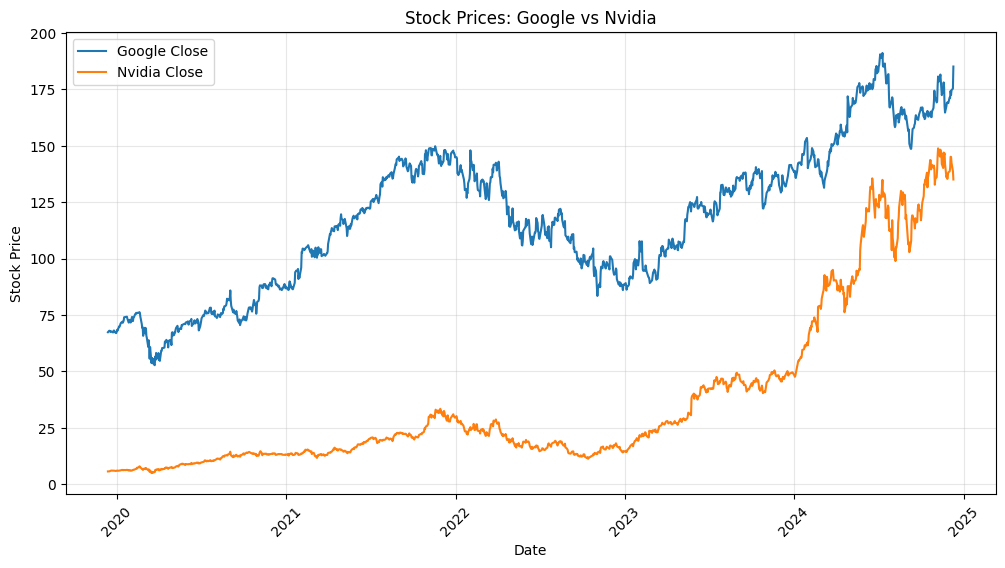

In [ ]:
#//Visualization of stock prices evolution

plt.figure(figsize=(12, 6)) #creation of the figure

#plotting close data
plt.plot(combined_data_stock.index, combined_data_stock['Google Close'], label='Google Close')
plt.plot(combined_data_stock.index, combined_data_stock['Nvidia Close'], label='Nvidia Close')

#adding the title, labels and legend
plt.title('Stock Prices: Google vs Nvidia')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

#adding aesthetic details
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

**For these two companies, an upward trend has been observed since 2023. It is therefore relevant to ask which one will reach a 20% return first. On the other hand, this initial visualization shows that the two companies have very different trends. Indeed, Google has a fairly stable evolution that appears periodic, whereas Nvidia's trend resembles an exponential function. Based on this initial analysis, Google's volatility seems lower than Nvidia's, which exhibits larger variations. We will verify this further in the next steps.**

# <font color='#FF8C00'>**2. EVALUATION OF DATA PREDICTABILITY**</font>


# <font color='darkred'>Analysis of the distribution of daily returns</font>

In [ ]:
#//Calculation of daily returns and addind of corresponding columns to our dataset
combined_data_stock['Google Daily Return'] = combined_data_stock['Google Close'].pct_change()
combined_data_stock['Nvidia Daily Return'] = combined_data_stock['Nvidia Close'].pct_change()
google_returns = combined_data_stock['Google Daily Return'].dropna()
nvidia_returns = combined_data_stock['Nvidia Daily Return'].dropna()

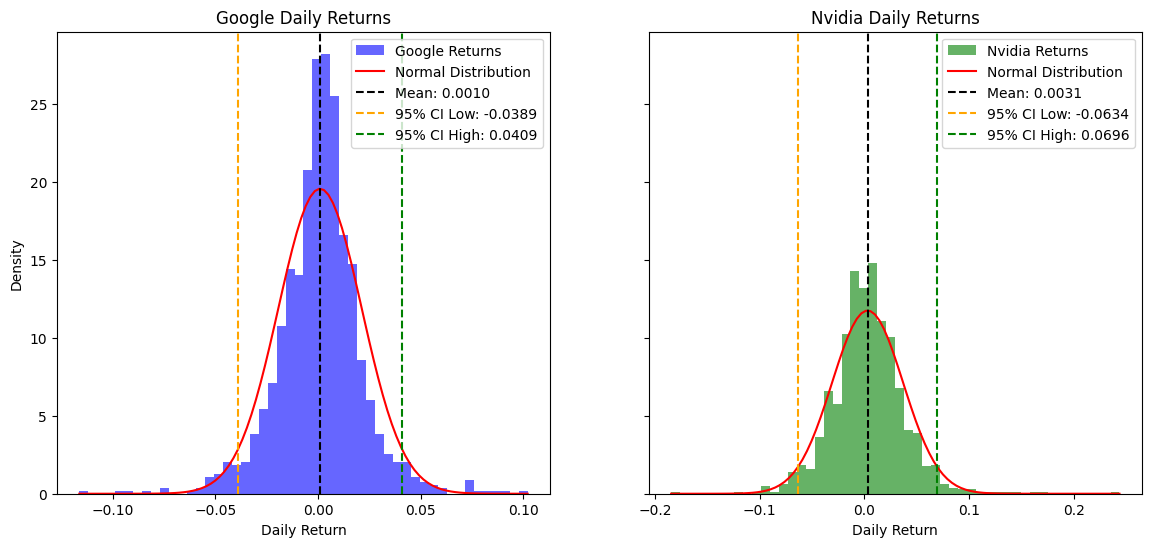

In [ ]:
#//Creation of the 2 histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Setting of the Google histogram
axes[0].hist(google_returns, bins=50, density=True, alpha=0.6, color='blue', label='Google Returns')
mean_google, std_google = google_returns.mean(), google_returns.std()
x_google = np.linspace(google_returns.min(), google_returns.max(), 100)
axes[0].plot(x_google, norm.pdf(x_google, mean_google, std_google), color='red', label='Normal Distribution')

#calculation and setting of the 95% confidence interval
google_interval_low = mean_google - 1.96 * std_google
google_interval_high = mean_google + 1.96 * std_google
axes[0].axvline(mean_google, color='black', linestyle='dashed', label=f'Mean: {mean_google:.4f}')
axes[0].axvline(google_interval_low, color='orange', linestyle='dashed', label=f'95% CI Low: {google_interval_low:.4f}')
axes[0].axvline(google_interval_high, color='green', linestyle='dashed', label=f'95% CI High: {google_interval_high:.4f}')

axes[0].set_title('Google Daily Returns')
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Density')
axes[0].legend()

#----------------------------------------------

#Setting of the Nvidia histogram
axes[1].hist(nvidia_returns, bins=50, density=True, alpha=0.6, color='green', label='Nvidia Returns')
mean_nvidia, std_nvidia = nvidia_returns.mean(), nvidia_returns.std()
x_nvidia = np.linspace(nvidia_returns.min(), nvidia_returns.max(), 100)
axes[1].plot(x_nvidia, norm.pdf(x_nvidia, mean_nvidia, std_nvidia), color='red', label='Normal Distribution')

#calculation and setting of the 95% confidence interval
nvidia_interval_low = mean_nvidia - 1.96 * std_nvidia
nvidia_interval_high = mean_nvidia + 1.96 * std_nvidia
axes[1].axvline(mean_nvidia, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_nvidia:.4f}')
axes[1].axvline(nvidia_interval_low, color='orange', linestyle='dashed', label=f'95% CI Low: {nvidia_interval_low:.4f}')
axes[1].axvline(nvidia_interval_high, color='green', linestyle='dashed', label=f'95% CI High: {nvidia_interval_high:.4f}')

axes[1].set_title('Nvidia Daily Returns')
axes[1].set_xlabel('Daily Return')
axes[1].legend()


**The means of Google's and Nvidia's daily returns are approximately zero, and we observe through the standard normal curve that they have a symmetric distribution. This indicates a certain balance between price increases and decreases. Additionally, 95% of the values are concentrated near the center (between -0.06 and 0.07), meaning the distribution is narrow. This is a positive sign, as extreme returns are rare, reflecting limited price variation.**

# <font color='darkred'>Calculation of volatilites</font>

In [ ]:
#//Volatility Calculation, since we have seen that is may be an important value

google_returns = google_data['Google Close'].pct_change().dropna()
nvidia_returns = nvidia_data['Nvidia Close'].pct_change().dropna()

google_volatility = google_returns.std()
nvidia_volatility = nvidia_returns.std()

#We will say that there is 252 trading days in a year, source = stockstotrade.com

annualized_google_volatility = google_volatility*(252**0.5)
annualized_nvidia_volatility = nvidia_volatility*(252**0.5)

print(f"Annualized Google Volatility: {annualized_google_volatility * 100} %")
print(f"Annualized Nvidia Volatility: {annualized_nvidia_volatility * 100} %")

Annualized Google Volatility: 32.33747975164151 %
Annualized Nvidia Volatility: 53.84673870963248 %


**Unsurprisingly, Nvidia's volatility is higher than Google's. Therefore, the prediction for Google will be more reliable than the one for Nvidia. Nevertheless, both volatilities are acceptable and allow us to proceed with forecasting with a good chance of success.**

# <font color='darkred'>Analysis of EMAs</font>

#####**There is two types of moving average : SMA (simple moving average) and EMA (exponential moving average). We decided to choose the EMA since it emphasis the most recent data, and since the evolution of nvidia is not linear but more exponential we find that more interessing.**

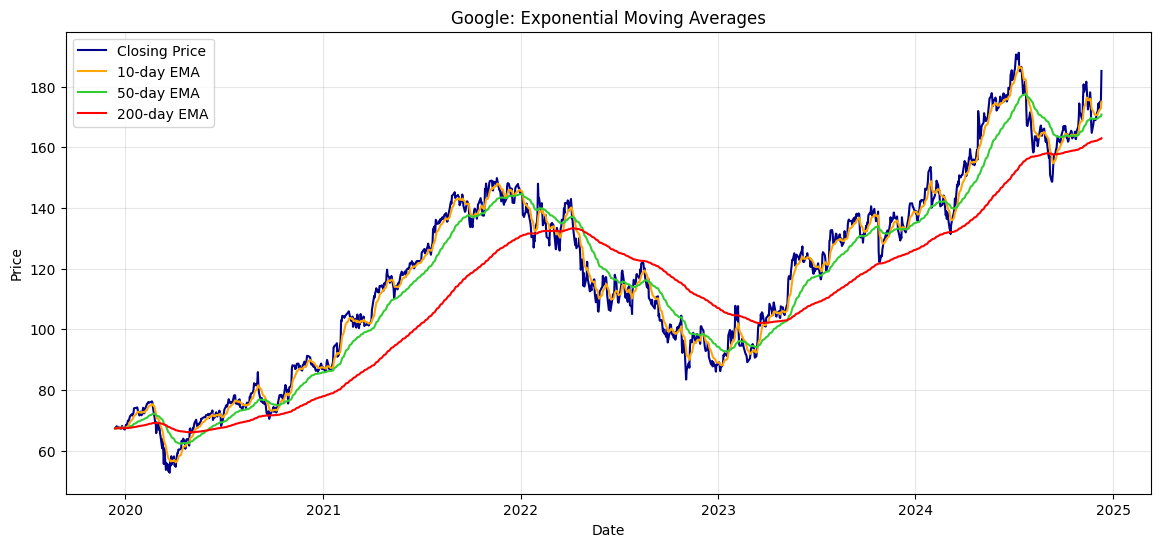

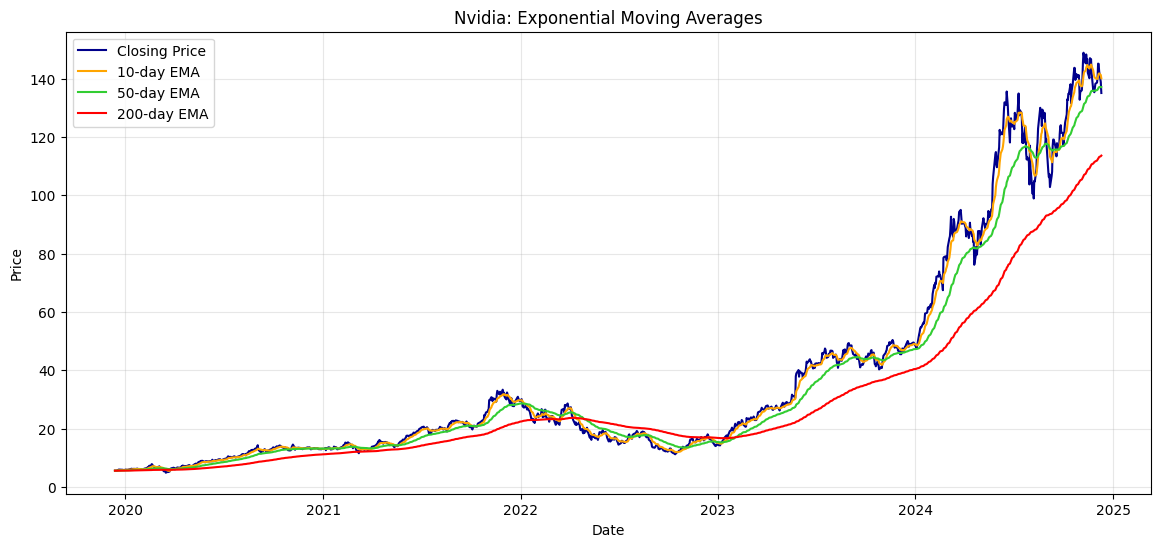

In [ ]:
#//Visualization of different EMAs

#calculation of Google EMAs
google_data['10_d_avg'] = google_data['Google Close'].ewm(span=10, adjust=False).mean()
google_data['50_d_avg'] = google_data['Google Close'].ewm(span=50, adjust=False).mean()
google_data['200_d_avg'] = google_data['Google Close'].ewm(span=200, adjust=False).mean()

#calculation of Nvidia EMAs
nvidia_data['10_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=10, adjust=False).mean()
nvidia_data['50_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=50, adjust=False).mean()
nvidia_data['200_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=200, adjust=False).mean()

#Setting and display of the Google graph
plt.figure(figsize=(14, 6))
plt.plot(google_data.index, google_data['Google Close'], label='Closing Price', color='darkblue')
plt.plot(google_data.index, google_data['10_d_avg'], label='10-day EMA', color='orange')
plt.plot(google_data.index, google_data['50_d_avg'], label='50-day EMA', color='limegreen')
plt.plot(google_data.index, google_data['200_d_avg'], label='200-day EMA', color='red')
plt.title('Google: Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)

#Setting and display of the Nvidia graph
plt.figure(figsize=(14, 6))
plt.plot(nvidia_data.index, nvidia_data['Nvidia Close'], label='Closing Price', color='darkblue')
plt.plot(nvidia_data.index, nvidia_data['10_d_avg'], label='10-day EMA', color='orange')
plt.plot(nvidia_data.index, nvidia_data['50_d_avg'], label='50-day EMA', color='limegreen')
plt.plot(nvidia_data.index, nvidia_data['200_d_avg'], label='200-day EMA', color='red')
plt.title('Nvidia: Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)


**We notice that after a significant crossover between the 50-day EMA and the 200-day EMA in 2023 (indicating a strong upward trend), these two EMAs are farther apart in the case of Nvidia. The slower EMA is therefore less effective in analyzing Nvidia's trends compared to Google's. This justifies the choice of different EMAs to smooth the data of the two companies in the next step.**

# <font color='#FF8C00'>**3. PREPARATION OF THE DATA**</font>


# <font color='darkred'>Assignment of EMAs</font>

#####**Based on the previous analysis, we assign different EMAs to Nvidia and Google. Here, we select the 50-day EMA for Nvidia and a slightly slower EMA for Google, the 100-day EMA.**

In [ ]:
#//Moving Average

ema_range_google = 100 #in days
ema_range_nvidia = 50 #in days

google_ema = google_data['Google Close'].ewm(span= ema_range_google, adjust = False).mean()
nvidia_ema = nvidia_data['Nvidia Close'].ewm(span= ema_range_nvidia, adjust = False).mean()

#print(google_ema)
#print(nvidia_ema)

Text(0.5, 1.0, 'Nvidia Stock Price with 50 day EMA')

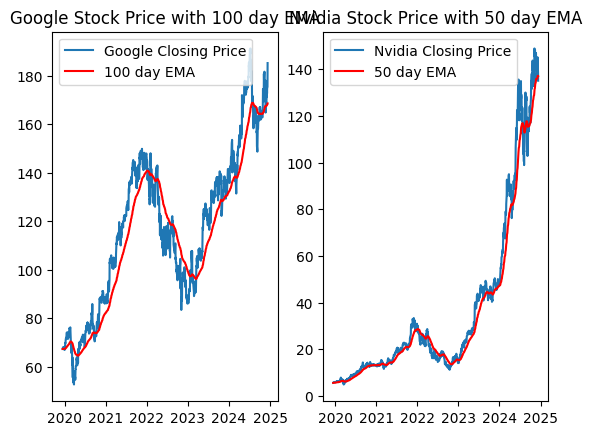

In [ ]:
#//Visualization of the EMA
#Google EMA
plt.subplot(1, 2, 1)
plt.plot(google_data['Google Close'], label='Google Closing Price')
plt.plot(google_ema, label=f'{ema_range_google} day EMA', color='red')
plt.legend()
plt.title(f'Google Stock Price with {ema_range_google} day EMA')

#Nvidia EMA
plt.subplot(1, 2, 2)
plt.plot(nvidia_data['Nvidia Close'], label='Nvidia Closing Price')
plt.plot(nvidia_ema, label=f'{ema_range_nvidia} day EMA', color='red')
plt.legend()
plt.title(f'Nvidia Stock Price with {ema_range_nvidia} day EMA')

#####**Since we want to predict whether the stock price goes up or down, we will create a variable price movement : 1 if it goes up / 0 if it goes down.**

In [ ]:
#//Preparation of the data

google_data['Price Movement'] = (google_data['Google Close'].shift(-1) > google_data['Google Close']).astype(int)
nvidia_data['Price Movement']=(nvidia_data['Nvidia Close'].shift(-1) > nvidia_data['Nvidia Close']).astype(int)

combined_data_stock = google_data.merge(nvidia_data, left_index=True, right_index=True, suffixes =(' Google', ' Nvidia'))
combined_data_stock = combined_data_stock.dropna()

#Integration of the volatility, the mobing average into combined_data
combined_data_stock['Google Volatility'] = google_returns.rolling(window=50).std()
combined_data_stock['Nvidia Volatility'] = nvidia_returns.rolling(window=50).std()

combined_data_stock['Google 100 days EMA'] = google_ema
combined_data_stock['Nvidia 50 days EMA'] = nvidia_ema

combined_data_stock = combined_data_stock.dropna()
print(combined_data_stock.head(5))

            Google Open  Google Close  Google Volume  10_d_avg Google  \
Date                                                                    
2020-02-27    67.957001     65.747498       62290000        71.461649   
2020-02-28    63.715500     66.962502       80198000        70.643622   
2020-03-02    67.569504     69.316002       55430000        70.402237   
2020-03-03    69.884003     66.886002       56602000        69.762921   
2020-03-04    67.947998     69.080002       47598000        69.638754   

            50_d_avg Google  200_d_avg Google  Price Movement Google  \
Date                                                                   
2020-02-27        71.662545         69.077768                      1   
2020-02-28        71.478230         69.056721                      1   
2020-03-02        71.393436         69.059300                      0   
2020-03-03        71.216674         69.037676                      1   
2020-03-04        71.132883         69.038097           

# <font color='darkred'>Analysis of the Correlation Matrix</font>

#####**Before doing a Decision Tree, we need to know the correlation between Nvidia data and Google data. If the correlation is high, we will use Nvidia data to predict Google, and vice versa.**

Text(0.5, 1.0, 'Correlation Matrix between Google and Nvidia Features')

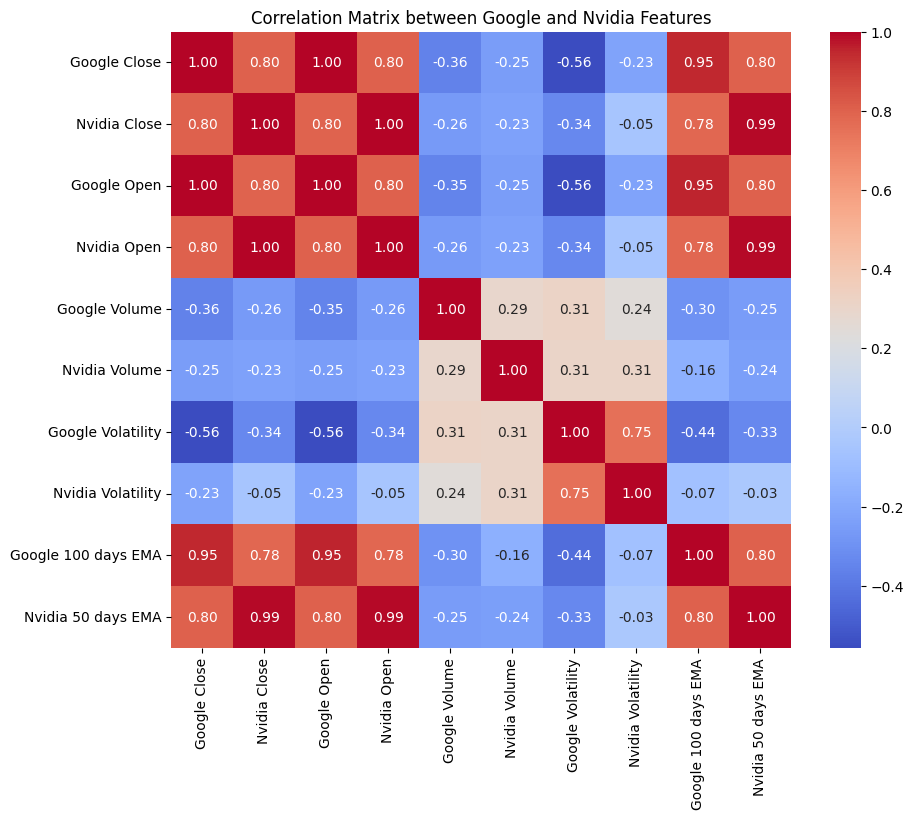

In [ ]:
#//Correlation Matrix

correlation_colums = ['Google Close', 'Nvidia Close', 'Google Open', 'Nvidia Open', 'Google Volume', 'Nvidia Volume', 'Google Volatility', 'Nvidia Volatility', 'Google 100 days EMA', 'Nvidia 50 days EMA']
correlation_matrix = combined_data_stock[correlation_colums].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between Google and Nvidia Features")

#####**So we can see that some evident data aren't correlated (ex : Google Close with Google Volume). But there is some interesting data that are correlated (ex : Nvidia Close with Google Close). So we need to keep Nvidia data for prevision for Google and vice versa.**

**We also learn from this correlation matrix that the prices of Google and Nvidia are closely linked, suggesting that their fluctuations are directly influenced by the same movements and events in the technology sector. Thus, integrating macroeconomic variables could be a way to improve the performance of our model. Furthermore, this matrix confirms that the chosen EMAs are relevant.**

# <font color='darkred'>Analysis of the Seasonality</font>


###**For Google**

<Figure size 640x480 with 0 Axes>

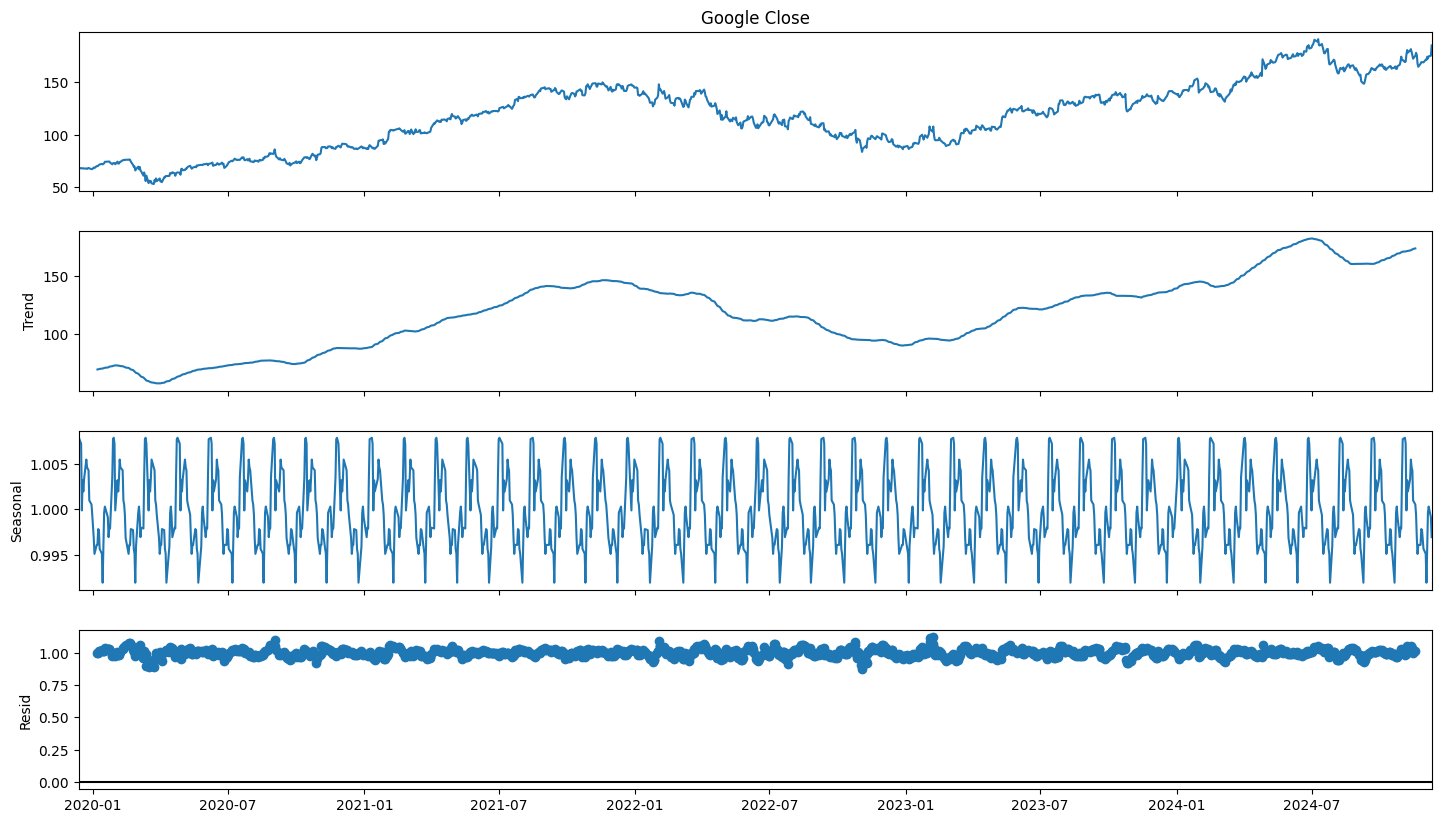

In [ ]:
result = seasonal_decompose(google_data['Google Close'], model='multiplicative', period=30)

# Visualisation des composants
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

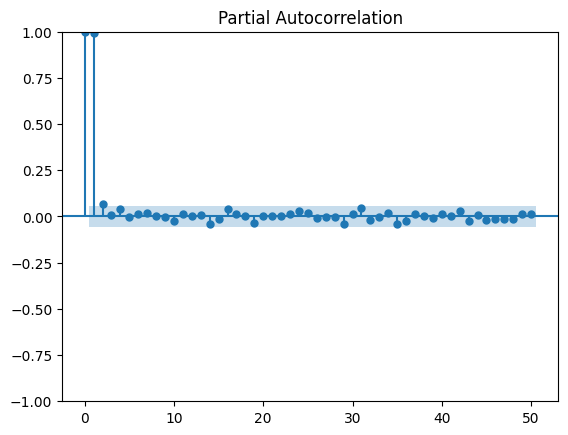

In [ ]:
data=pd.to_datetime(google_data['Google Close'])
plot_pacf(data, lags=50)
plt.show()

###**For Nvidia**

<Figure size 640x480 with 0 Axes>

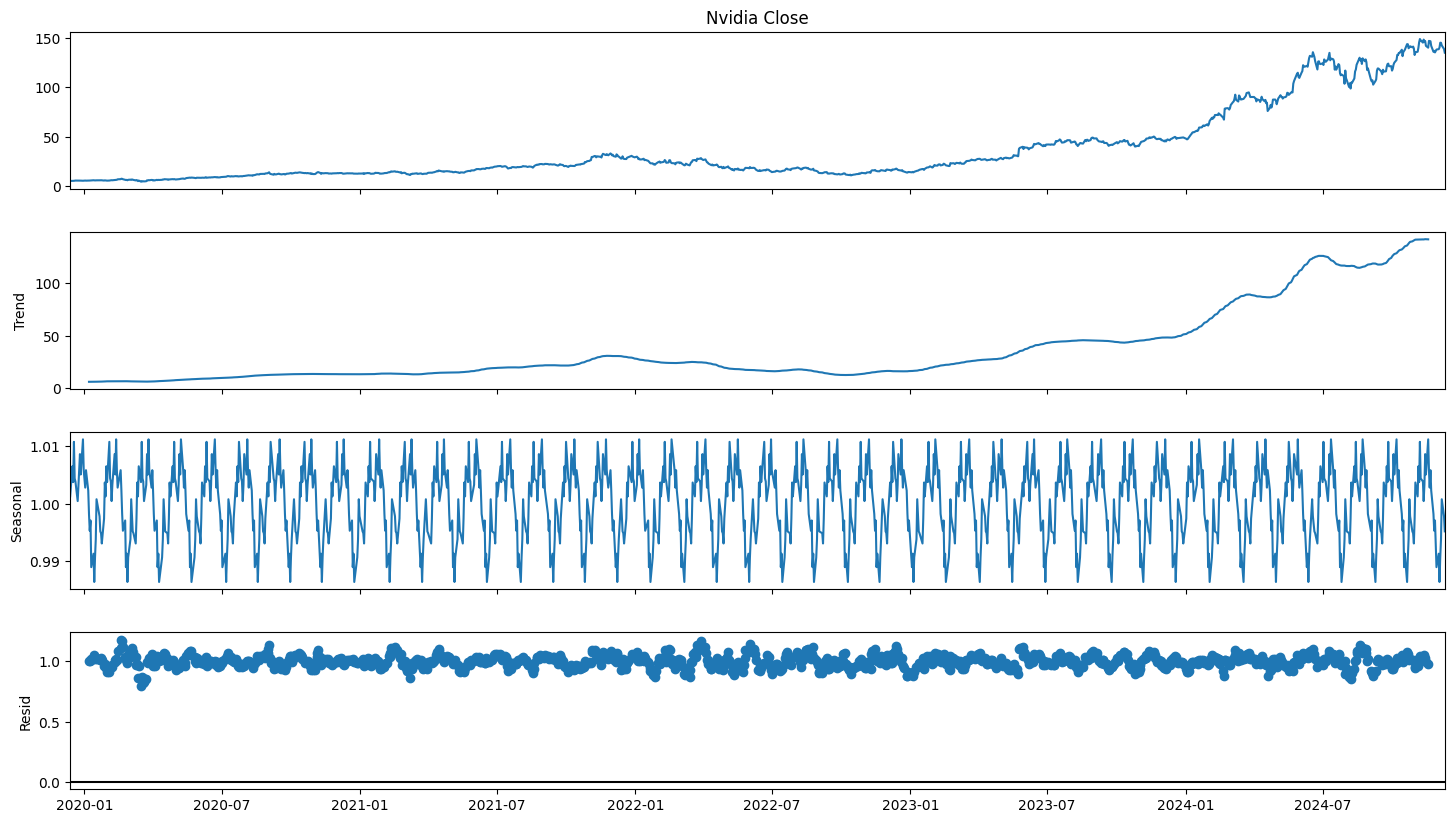

In [ ]:
result = seasonal_decompose(nvidia_data['Nvidia Close'], model='multiplicative', period=30)

# Visualisation des composants
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

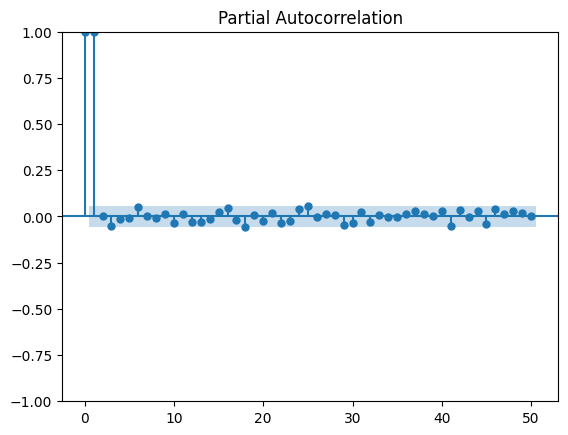

In [ ]:
data=pd.to_datetime(nvidia_data['Nvidia Close'])
plot_pacf(data, lags=50)
plt.show()

**We observe in this seasonal decomposition that our data is not stationary due to the "Trend" components. Additionally, we notice clear and regular periodic patterns in the "Seasonal" components, indicating that our data is seasonal. It is important to know these two pieces of information to select appropriate algorithms later on.**

# <font color='#FF8C00'>**4. APPLICATION OF CLASSICAL PREDICTION ALGORITHMS**</font>


# <font color='darkred'>DecisionTreeClassifier</font>


In [ ]:
#//Decision Tree using DecisionTreeClassifier

features = ['Google 100 days EMA', 'Nvidia 50 days EMA', 'Google Volatility', 'Nvidia Volatility']
X = combined_data_stock[features]
y_google = combined_data_stock['Price Movement Google']
y_nvidia = combined_data_stock['Price Movement Nvidia']

#So now we are spliting our data into training and testing sets
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X,y_google, test_size = 0.3, random_state = 42)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X,y_nvidia, test_size = 0.3, random_state = 42 )


model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"Decision Tree Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"Decision Tree Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

Decision Tree Accuracy with Google price movement : 0.5193
Decision Tree Accuracy with Nvidia price movement : 0.4807


#####**Our results mean that our model was able to predict correctly the movement of nvidia price at 51% and google's one at 53%. So our model is not the best. What about testing a new one ? We can also improve this one by adding more features.**

# <font color='darkred'>Logistic Regression</font>


In [ ]:
#//Logistic Regression using sklearn

model = LogisticRegression()
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"Logistic Regression Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"Logistic Regression Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

Logistic Regression Accuracy with Google price movement : 0.5304
Logistic Regression Accuracy with Nvidia price movement : 0.5193


#####**We can see that our results are slightly better, (58% with Google and 55% with Nvidia), we will need to improve it.**


# <font color='darkred'>Support Vector Machine</font>

In [ ]:
#//Support Vector Machine using sklearn

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"SVM Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"SVM Regression Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

SVM Accuracy with Google price movement : 0.5304
SVM Regression Accuracy with Nvidia price movement : 0.5193


#####**Our results are still slightly better (58% for Google and 55% with Nvidia).**

# <font color='darkred'>Random Forest</font>

In [ ]:
#//Random Forest using sklearn

model = RandomForestClassifier(n_estimators=100, random_state=42)

#training of the model on Google
model.fit(X_train_g, y_train_g)
y_pred_g = model.predict(X_test_g)
accuracy_g = accuracy_score(y_test_g, y_pred_g)

#training of the model on Nvidia
model.fit(X_train_n, y_train_n)
y_pred_n = model.predict(X_test_n)
accuracy_n = accuracy_score(y_test_n, y_pred_n)

#display
print(f"Random Forest Accuracy with Google price movement: {accuracy_g:.4f}")
print(f"Random Forest Accuracy with Nvidia price movement: {accuracy_n:.4f}")

Random Forest Accuracy with Google price movement: 0.4724
Random Forest Accuracy with Nvidia price movement: 0.4669


#####**We observe that Random Forest is the less adapted model for our data.**

# <font color='darkred'>LSTM</font>

###**LSTM for Google**

train_scaled.shape: (1004, 2)
test_scaled.shape: (252, 2)
scaled_train_target.shape: (1004, 1)
scaled_test_target.shape: (252, 1)
X_train.shape: (944, 60, 2)
y_train.shape: (944, 1)
X_test.shape: (252, 60, 2)
y_test.shape: (252, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 0.1123 - val_loss: 0.0057
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0135 - val_loss: 0.0048
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0099 - val_loss: 0.0107
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0093 - val_loss: 0.0055
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0086 - val_loss: 0.0085


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Evaluation Metrics:
Mean Squared Error (MSE): 191.2396
Root Mean Squared Error (RMSE): 13.8289
Mean Absolute Error (MAE): 11.6120
Mean Absolute Percentage Error (MAPE): 7.03%
R-squared (R²): 0.1318
Accuracy: 92.97%


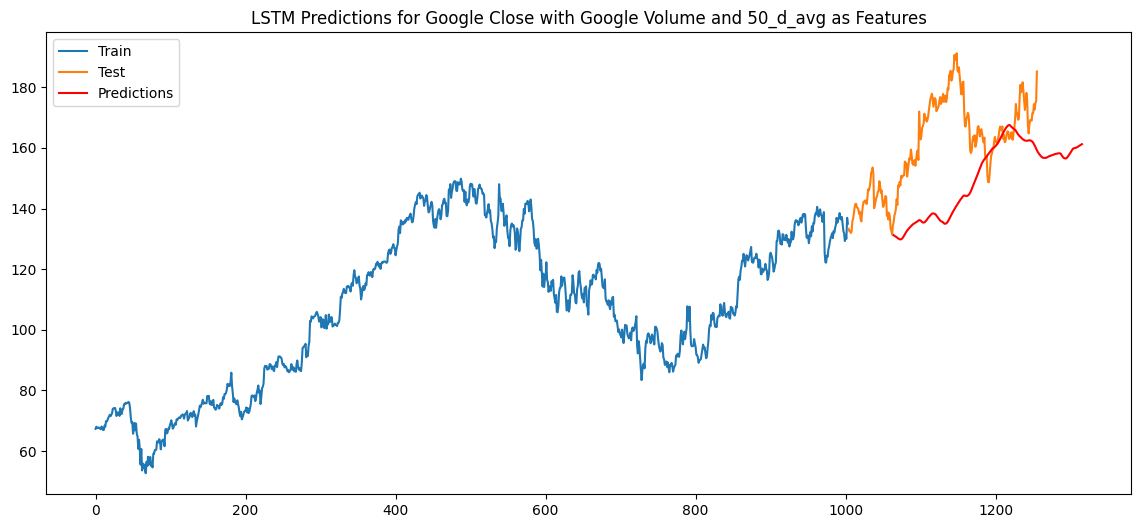

In [ ]:
# Paramètres
sequence_length = 60

# Récupération des colonnes pertinentes pour les variables explicatives et la cible
features = ['Google Volume', '50_d_avg']  # Variables explicatives
target = 'Google Close'  # Variable cible

# Préparation des données
google_data_features = google_data[features].values
google_data_target = google_data[target].values

# Séparation en données d'entraînement et de test
train_size = int(len(google_data) * 0.8)
train_features = google_data_features[:train_size]
test_features = google_data_features[train_size:]
train_target = google_data_target[:train_size]
test_target = google_data_target[train_size:]

# Normalisation des données
scalers = {}
scaled_train_features = {}
scaled_test_features = {}

# Normaliser les variables explicatives
for i, feature in enumerate(features):
    scalers[feature] = MinMaxScaler((0, 1))
    scaled_train_features[feature] = scalers[feature].fit_transform(train_features[:, i].reshape(-1, 1))
    scaled_test_features[feature] = scalers[feature].transform(test_features[:, i].reshape(-1, 1))

# Normalisation de la variable cible
scaler_target = MinMaxScaler((0, 1))
scaled_train_target = scaler_target.fit_transform(train_target.reshape(-1, 1))
scaled_test_target = scaler_target.transform(test_target.reshape(-1, 1))

# Combiner les variables explicatives normalisées
train_scaled = np.hstack([scaled_train_features[feature] for feature in features])
test_scaled = np.hstack([scaled_test_features[feature] for feature in features])

# Fonction pour créer les séquences
def create_sequences_multivariate(features, target, length):
    X, y = [], []
    for i in range(length, len(features)):
        X.append(features[i-length:i, :])  # Inclure les variables explicatives dans la séquence
        y.append(target[i])  # Inclure la cible correspondante
    return np.array(X), np.array(y)

# Vérification des dimensions avant de concaténer les données
print(f"train_scaled.shape: {train_scaled.shape}")
print(f"test_scaled.shape: {test_scaled.shape}")
print(f"scaled_train_target.shape: {scaled_train_target.shape}")
print(f"scaled_test_target.shape: {scaled_test_target.shape}")

# Concatenation des données pour éviter les problèmes d'indexation
combined_scaled = np.vstack((train_scaled[-sequence_length:], test_scaled))
combined_target = np.vstack((scaled_train_target[-sequence_length:], scaled_test_target))

# Création des séquences
X_train, y_train = create_sequences_multivariate(train_scaled, scaled_train_target, sequence_length)
X_test, y_test = create_sequences_multivariate(combined_scaled, combined_target, sequence_length)

# Vérification des dimensions des séquences
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

# Modèle LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Prédictions
predictions = scaler_target.inverse_transform(
    model_lstm.predict(X_test).reshape(-1, 1)
)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Évaluation des performances
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
accuracy = 100 - mape

mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))

# Cible d'entraînement
plt.plot(train_target, label='Train')

# Cible de test
plt.plot(range(train_size, len(google_data)), test_target, label='Test')

# Prédictions (alignement des indices)
start_idx = train_size + sequence_length  # Les prédictions commencent après les séquences de train
plt.plot(range(start_idx, start_idx + len(predictions)), predictions, c='red', label='Predictions')

plt.legend()
plt.title("LSTM Predictions for Google Close with Google Volume and 50_d_avg as Features")
plt.show()


#####**The LSTM is a highly suitable algorithm for our problem as it accounts for the temporal dependencies present in the time series. Here, we achieve excellent results for forecasting Google.**

###**LSTM for Nvidia**

train_scaled.shape: (1004, 2)
test_scaled.shape: (252, 2)
scaled_train_target.shape: (1004, 1)
scaled_test_target.shape: (252, 1)
X_train.shape: (944, 60, 2)
y_train.shape: (944, 1)
X_test.shape: (252, 60, 2)
y_test.shape: (252, 1)
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0313 - val_loss: 0.0230
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0048 - val_loss: 0.0274
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0042 - val_loss: 0.0258
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0040 - val_loss: 0.0197
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0038 - val_loss: 0.0163
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Evaluation Metrics:
Mean Squared Error (MSE): 742.2727
Root Mean Squared Error (RMSE): 27.2447
Mean Absolute Error (MAE): 24.0357
Mean Absolute Percentage Error (MAPE): 21.92%
R-squared (R²): 0.1280
Accuracy: 78.08%


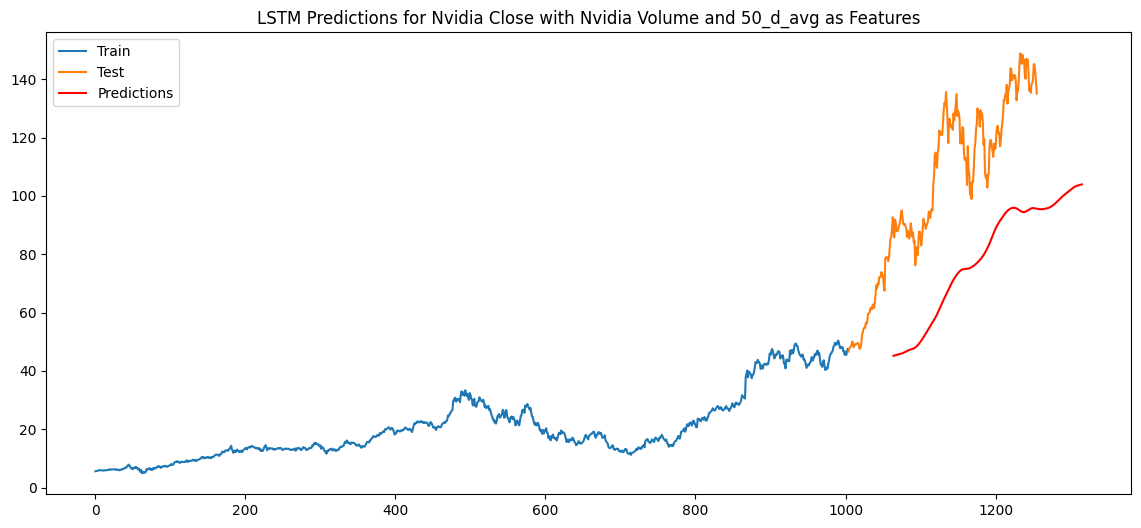

In [ ]:
# Paramètres
sequence_length = 60

# Récupération des colonnes pertinentes pour les variables explicatives et la cible
features = ['Nvidia Volume', '50_d_avg']  # Variables explicatives
target = 'Nvidia Close'  # Variable cible

# Préparation des données
nvidia_data_features = nvidia_data[features].values
nvidia_data_target = nvidia_data[target].values

# Séparation en données d'entraînement et de test
train_size = int(len(nvidia_data) * 0.8)
train_features = nvidia_data_features[:train_size]
test_features = nvidia_data_features[train_size:]
train_target = nvidia_data_target[:train_size]
test_target = nvidia_data_target[train_size:]

# Normalisation des données
scalers = {}
scaled_train_features = {}
scaled_test_features = {}

# Normaliser les variables explicatives
for i, feature in enumerate(features):
    scalers[feature] = MinMaxScaler((0, 1))
    scaled_train_features[feature] = scalers[feature].fit_transform(train_features[:, i].reshape(-1, 1))
    scaled_test_features[feature] = scalers[feature].transform(test_features[:, i].reshape(-1, 1))

# Normalisation de la variable cible
scaler_target = MinMaxScaler((0, 1))
scaled_train_target = scaler_target.fit_transform(train_target.reshape(-1, 1))
scaled_test_target = scaler_target.transform(test_target.reshape(-1, 1))

# Combiner les variables explicatives normalisées
train_scaled = np.hstack([scaled_train_features[feature] for feature in features])
test_scaled = np.hstack([scaled_test_features[feature] for feature in features])

# Fonction pour créer les séquences
def create_sequences_multivariate(features, target, length):
    X, y = [], []
    for i in range(length, len(features)):
        X.append(features[i-length:i, :])  # Inclure les variables explicatives dans la séquence
        y.append(target[i])  # Inclure la cible correspondante
    return np.array(X), np.array(y)

# Vérification des dimensions avant de concaténer les données
print(f"train_scaled.shape: {train_scaled.shape}")
print(f"test_scaled.shape: {test_scaled.shape}")
print(f"scaled_train_target.shape: {scaled_train_target.shape}")
print(f"scaled_test_target.shape: {scaled_test_target.shape}")

# Concatenation des données pour éviter les problèmes d'indexation
combined_scaled = np.vstack((train_scaled[-sequence_length:], test_scaled))
combined_target = np.vstack((scaled_train_target[-sequence_length:], scaled_test_target))

# Création des séquences
X_train, y_train = create_sequences_multivariate(train_scaled, scaled_train_target, sequence_length)
X_test, y_test = create_sequences_multivariate(combined_scaled, combined_target, sequence_length)

# Vérification des dimensions des séquences
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

# Modèle LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Prédictions
predictions = scaler_target.inverse_transform(
    model_lstm.predict(X_test).reshape(-1, 1)
)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Évaluation des performances
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
accuracy = 100 - mape

mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))

# Cible d'entraînement
plt.plot(train_target, label='Train')

# Cible de test
plt.plot(range(train_size, len(nvidia_data)), test_target, label='Test')

# Prédictions (alignement des indices)
start_idx = train_size + sequence_length  # Les prédictions commencent après les séquences de train
plt.plot(range(start_idx, start_idx + len(predictions)), predictions, c='red', label='Predictions')

plt.legend()
plt.title("LSTM Predictions for Nvidia Close with Nvidia Volume and 50_d_avg as Features")
plt.show()


#####**In the case of Nvidia, we observe that the predictions deviate more from the actual values. We will study how to improve the results later. It might be necessary to choose a more suitable EMA or add macroeconomic data.**

**We notice that the LSTM is the most effective forecasting algorithm. Therefore, we will use it to predict stock prices for the next 5 years.**

#**STAGE 2**

In this stage of the project, we are going to test SARIMAX and Prophet in order to compare them to LSTM. We will use the model with the best results for our forecasting.

# **<font color='darkred'>SARIMAX</font>**

###**SARIMAX for Google**

ADF Statistic: -1.5103723493518955
p-value: 0.5283741883598357
Data is not stationary. Differencing might be needed.


<Figure size 1200x600 with 0 Axes>

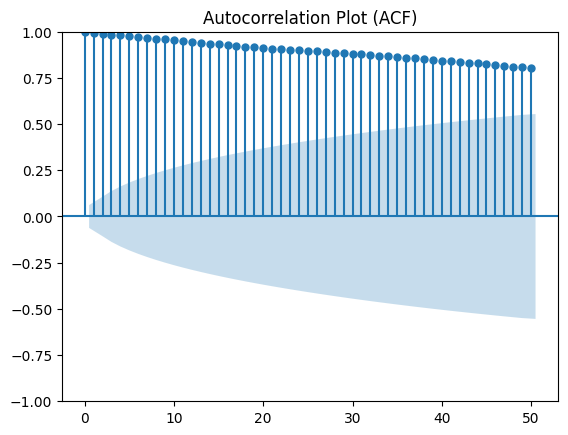

<Figure size 1200x600 with 0 Axes>

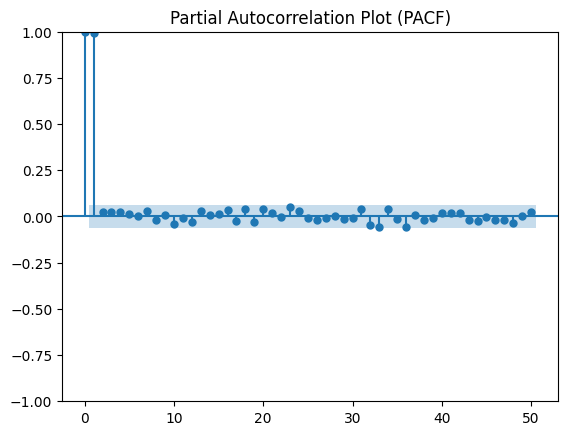

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4784.200, Time=5.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4789.768, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4789.544, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4789.516, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4790.785, Time=0.08 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-4789.040, Time=0.46 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-4788.875, Time=1.88 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-4787.010, Time=3.67 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-4790.294, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-4790.299, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-4788.297, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 14.311 seconds
Best SARIMA model: (0, 1, 0) with seasonality (0, 0, 0, 12)
                               SARIMAX Results                        

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

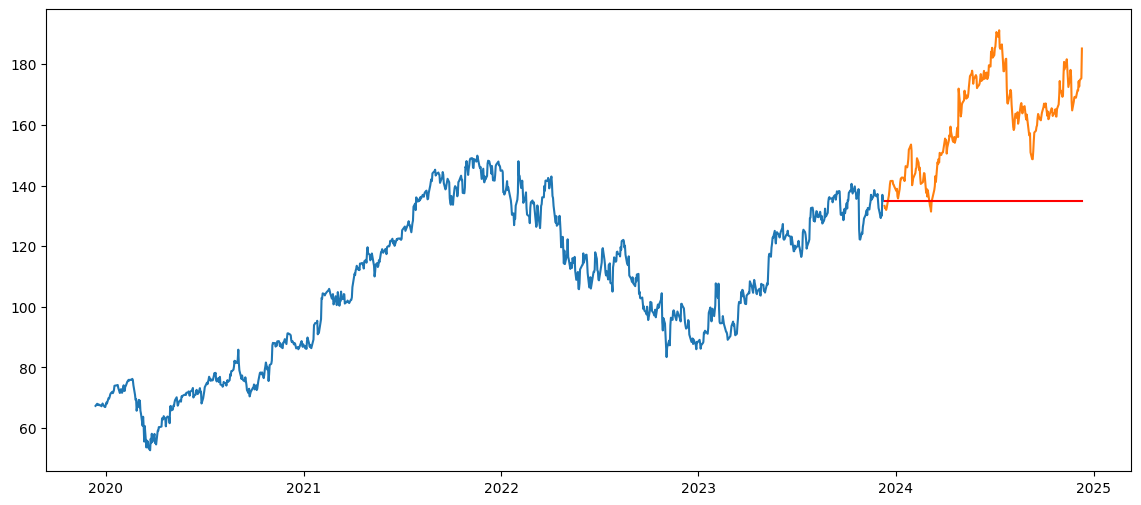

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Step 1: Load and Split Data
google_close = google_data['Google Close'].values
train_size = int(len(google_close) * 0.8)
train_data = google_close[:train_size]
test_data = google_close[train_size:]

# Step 2: Check for Stationarity
adf_result = adfuller(train_data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] > 0.05:
    print("Data is not stationary. Differencing might be needed.")
else:
    print("Data is stationary.")

# Step 3: ACF and PACF Analysis
plt.figure(figsize=(12, 6))
plot_acf(train_data, lags=50)
plt.title("Autocorrelation Plot (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(train_data, lags=50)
plt.title("Partial Autocorrelation Plot (PACF)")
plt.show()

# Step 4: Normalize Data (Optional, if the range is large)
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1)).flatten()

# Step 5: Use Auto-ARIMA to Identify Parameters
auto_model = auto_arima(train_data_scaled if scaler else train_data, seasonal=True, m=12, trace=True, stepwise=True, suppress_warnings=True)
print(f"Best SARIMA model: {auto_model.order} with seasonality {auto_model.seasonal_order}")
p, d, q = auto_model.order
P, D, Q, s = auto_model.seasonal_order

# Step 6: Train SARIMAX Model
model = SARIMAX(train_data_scaled if scaler else train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = model.fit(disp=False)
print(sarimax_result.summary())

# Step 7: Forecast Future Values
forecast_steps = len(test_data)  # Match the test set length
forecast = sarimax_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# If scaled, inverse-transform predictions
if scaler:
    forecast_values = scaler.inverse_transform(forecast_values.reshape(-1, 1)).flatten()

# Step 8: Evaluate Model
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast_values)
r2 = r2_score(test_data, forecast_values)
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
accuracy = 100 - mape

print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Step 9: Visualize Results
forecast_ci = forecast.conf_int()  # Confidence intervals

# Assuming google_data has a date-based index
date_indices = google_data.index[train_size:]  # Extract the test data indices

# Updated Visualization with Date Indices
plt.figure(figsize=(14, 6))
plt.plot(google_data.index[:train_size], train_data, label='Train')  # Use date-based index for train data
plt.plot(date_indices, test_data, label='Test')  # Use date-based index for test data
plt.plot(date_indices, forecast_values, color='red', label='Predictions SARIMAX')  # Use date indices

# Plot confidence intervals with matching date indices
plt.fill_between(date_indices,
                 forecast_ci.iloc[:, 0],  # Lower bound
                 forecast_ci.iloc[:, 1],  # Upper bound
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.axvline(x=google_data.index[train_size], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("SARIMAX Forecast with Confidence Intervals")
plt.show()



###**SARIMAX for Nvidia**

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2205.314, Time=12.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2197.726, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2201.394, Time=1.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2201.401, Time=2.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2199.077, Time=0.08 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2199.502, Time=0.99 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2199.512, Time=1.31 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2201.399, Time=2.95 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2199.611, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2199.608, Time=1.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2201.420, Time=4.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 28.098 seconds
Best SARIMA model: (0, 1, 0) with seasonality (0, 0, 0, 12)
                               SARIMAX Results                                
D

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Predictions SARIMAX vs our data')

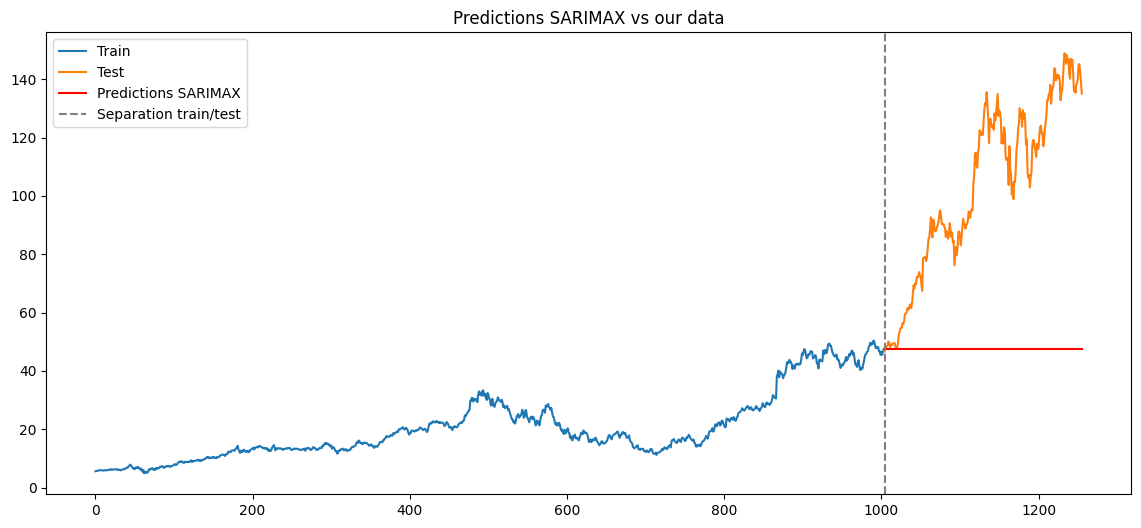

In [ ]:
nvidia_close = nvidia_data['Nvidia Close'].values
train_size = int(len(nvidia_close) * 0.8)

#division between train and test
train_data = nvidia_close[:train_size]
test_data = nvidia_close[train_size:]

#auto-ARIMA for identify (p, d, q) and the seasonality
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True, stepwise=True, suppress_warnings=True)
print(f"Best SARIMA model: {auto_model.order} with seasonality {auto_model.seasonal_order}")
p, d, q = auto_model.order
P, D, Q, s = auto_model.seasonal_order

#training
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = model.fit(disp=False)
print(sarimax_result.summary())

#prediction
forecast = sarimax_result.predict(start=train_size, end=len(google_close) - 1, typ='levels')

#metrics
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)
r2 = r2_score(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
accuracy = 100 - mape

#visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(14, 6))
plt.plot(train_data, label='Train')
plt.plot(range(train_size, len(nvidia_close)), test_data, label='Test')
plt.plot(range(train_size, len(nvidia_close)), forecast, color='red', label='Predictions SARIMAX')
plt.axvline(x=train_size, color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions SARIMAX vs our data")

We can see that SARIMAX is not working for our project for one main reason : our data is not stationnary. Even if we try to change it via the augmented Dickey-Full test and then implemented differencing, it remains not practical. So we will not use SARIMAX.

# **<font color='darkred'>Prophet</font>**

###**Prophet for Google**


DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/e2kmuo_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/yqsl67u_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33032', 'data', 'file=/tmp/tmp67lhjo0m/e2kmuo_2.json', 'init=/tmp/tmp67lhjo0m/yqsl67u_.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_modelcq9ki1o1/prophet_model-20241211174432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:44:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


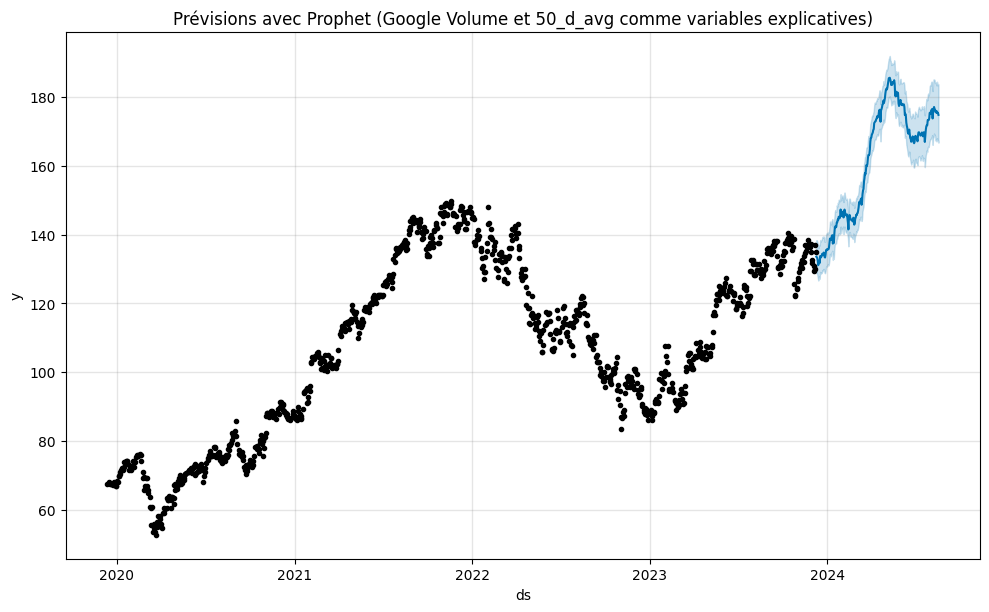

Evaluation Metrics:
Mean Squared Error (MSE): 83.0285
Root Mean Squared Error (RMSE): 9.1120
Mean Absolute Error (MAE): 7.4969
Mean Absolute Percentage Error (MAPE): 4.71%
R-squared (R²): 0.6231
Accuracy: 95.29%


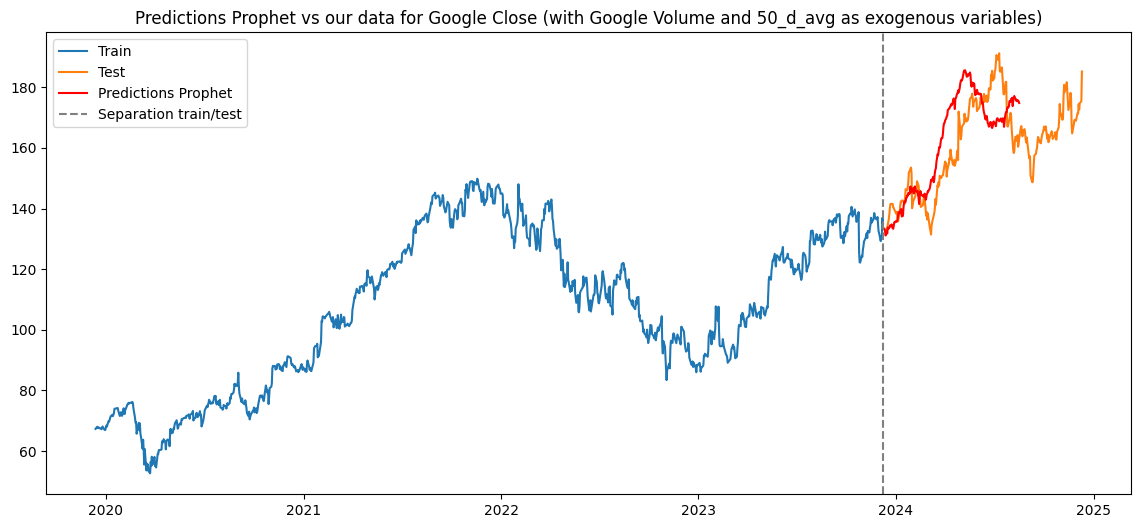

In [ ]:
features = ['Google Volume', '50_d_avg']
target = 'Google Close'

#preparation
google_data = google_data.copy()
train_size = int(len(google_data) * 0.8)

#separation
train_data = google_data.iloc[:train_size].copy()
test_data = google_data.iloc[train_size:].copy()

train_data = train_data.reset_index()[['Date'] + features + [target]]
test_data = test_data.reset_index()[['Date'] + features + [target]]

#columns rename for prophet
train_data.rename(columns={'Date': 'ds', 'Google Close': 'y', 'Google Volume': 'google_volume', '50_d_avg': 'avg_50d'}, inplace=True)
test_data.rename(columns={'Date': 'ds', 'Google Close': 'y', 'Google Volume': 'google_volume', '50_d_avg': 'avg_50d'}, inplace=True)

#creation of the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('google_volume')
model.add_regressor('avg_50d')

#training
model.fit(train_data)

#generation of the dataframe
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data) + 1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])

#adding exogenuous variables
future_data['google_volume'] = test_data['google_volume'].values
future_data['avg_50d'] = test_data['avg_50d'].values

#prediction
forecast = model.predict(future_data)

#visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet (Google Volume et 50_d_avg comme variables explicatives)")
plt.show()

#metrics
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#metrics visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

#results visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Google Close (with Google Volume and 50_d_avg as exogenous variables)")
plt.show()


###**Prophet for Nvidia**


DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/_2vxa06j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/ib88szl0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95101', 'data', 'file=/tmp/tmp67lhjo0m/_2vxa06j.json', 'init=/tmp/tmp67lhjo0m/ib88szl0.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_modelk5vptpar/prophet_model-20241211175141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


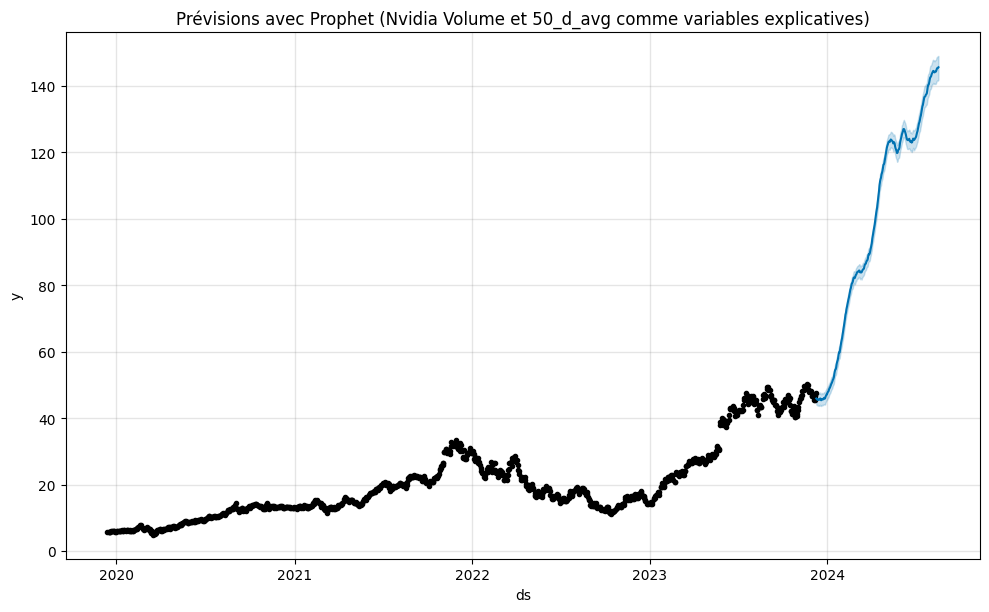

Evaluation Metrics:
Mean Squared Error (MSE): 111.9049
Root Mean Squared Error (RMSE): 10.5785
Mean Absolute Error (MAE): 8.6309
Mean Absolute Percentage Error (MAPE): 9.13%
R-squared (R²): 0.8685
Accuracy: 90.87%


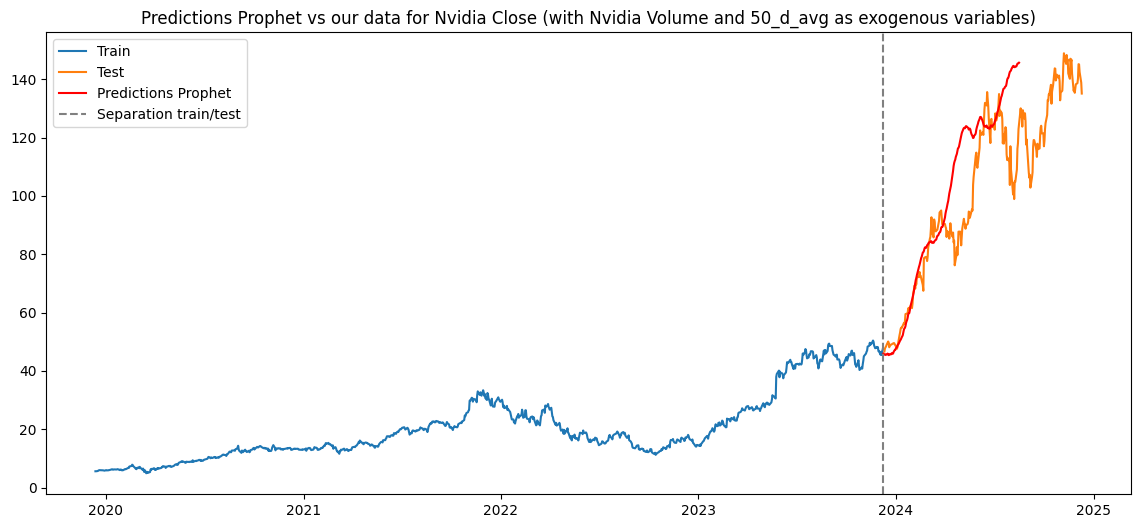

In [ ]:
features = ['Nvidia Volume', '50_d_avg']
target = 'Nvidia Close'

#preparation
nvidia_data = nvidia_data.copy()
train_size = int(len(nvidia_data) * 0.8)

#separation
train_data = nvidia_data.iloc[:train_size].copy()
test_data = nvidia_data.iloc[train_size:].copy()

train_data = train_data.reset_index()[['Date'] + features + [target]]
test_data = test_data.reset_index()[['Date'] + features + [target]]

#columns rename for prophet
train_data.rename(columns={'Date': 'ds', 'Nvidia Close': 'y', 'Nvidia Volume': 'nvidia_volume', '50_d_avg': 'avg_50d'}, inplace=True)
test_data.rename(columns={'Date': 'ds', 'Nvidia Close': 'y', 'Nvidia Volume': 'nvidia_volume', '50_d_avg': 'avg_50d'}, inplace=True)

#creation of the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('nvidia_volume')
model.add_regressor('avg_50d')

#training
model.fit(train_data)

#generation of the dataframe
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data) + 1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])

#adding exogenuous variables
future_data['nvidia_volume'] = test_data['nvidia_volume'].values
future_data['avg_50d'] = test_data['avg_50d'].values

#predictions
forecast = model.predict(future_data)

#visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet (Nvidia Volume et 50_d_avg comme variables explicatives)")
plt.show()

#metrics
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#metrics visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

#results visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Nvidia Close (with Nvidia Volume and 50_d_avg as exogenous variables)")
plt.show()


#**STAGE 3**

###**Adding Exogenous Data**

In order to add complexity to our project and obtain more accurate results, we are going to implement the S&P500 into our data. The S&P 500 is the most famous stock market index in the world, regrouping the 500 first American companies in the world.

# **<font color='darkred'>Adding the S&P 500 index</font>**

### **For Google**

##### Merging of the S&P data and google data

In [ ]:
#Download S&P data from Yahoo Finance
sp500_data = yf.download("^GSPC", start="2019-12-13", end="2024-12-11")[['Close']]
sp500_data.rename(columns={'Close': 'SP500'}, inplace=True)

#Checking if our colomn is multiindex or not
if isinstance(sp500_data.columns, pd.MultiIndex):
    sp500_data.columns = sp500_data.columns.droplevel(0)  #Delete the first level of the multiindex

sp500_data.rename(columns={'^GSPC': 'SP500'}, inplace=True)  #Column rename for clarity

merged_data = pd.merge(sp500_data, google_data, left_index=True, right_index=True, how='inner')
print(merged_data.head())

[*********************100%***********************]  1 of 1 completed

                  SP500  Google Open  Google Close  Google Volume   10_d_avg  \
Date                                                                           
2019-12-13  3168.800049    67.394997     67.343498       33170000  67.343498   
2019-12-16  3191.449951    67.750000     68.035004       28128000  67.469226   
2019-12-17  3192.520020    68.120499     67.744499       32948000  67.519276   
2019-12-18  3191.139893    67.849998     67.595497       23330000  67.533134   
2019-12-19  3205.370117    67.595497     67.821999       28922000  67.585655   

             50_d_avg  200_d_avg  Price Movement  
Date                                              
2019-12-13  67.343498  67.343498               1  
2019-12-16  67.370616  67.350379               0  
2019-12-17  67.385278  67.354300               0  
2019-12-18  67.393522  67.356700               1  
2019-12-19  67.410325  67.361330               0  


##### Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/lz6yxkkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/s3df9odl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31619', 'data', 'file=/tmp/tmp67lhjo0m/lz6yxkkp.json', 'init=/tmp/tmp67lhjo0m/s3df9odl.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_modelrbsutum6/prophet_model-20241211181324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:13:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:13:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


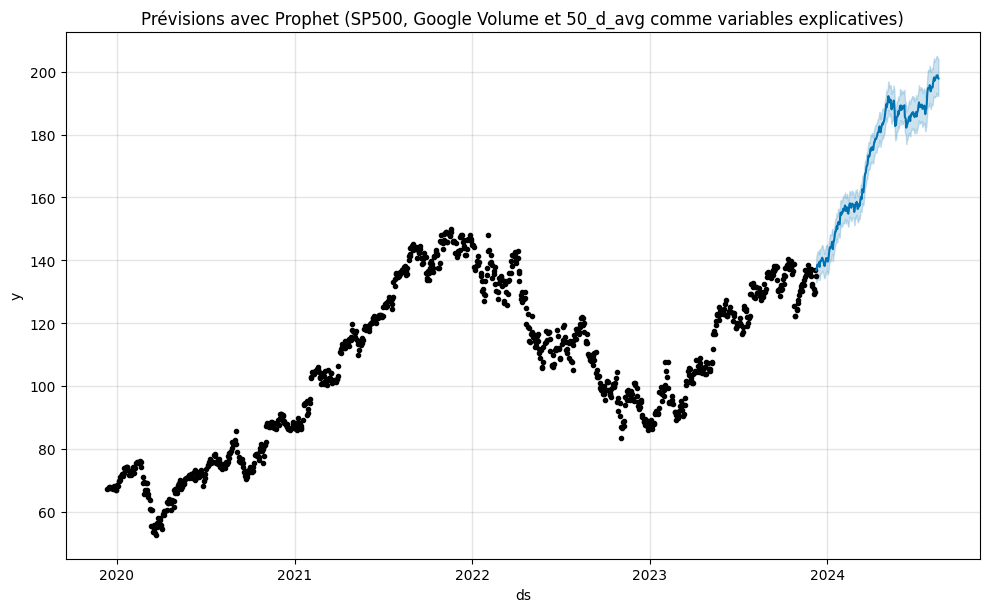

Evaluation Metrics:
Mean Squared Error (MSE): 253.2910
Root Mean Squared Error (RMSE): 15.9151
Mean Absolute Error (MAE): 12.2405
Mean Absolute Percentage Error (MAPE): 7.64%
R-squared (R²): -0.1499
Accuracy: 92.36%


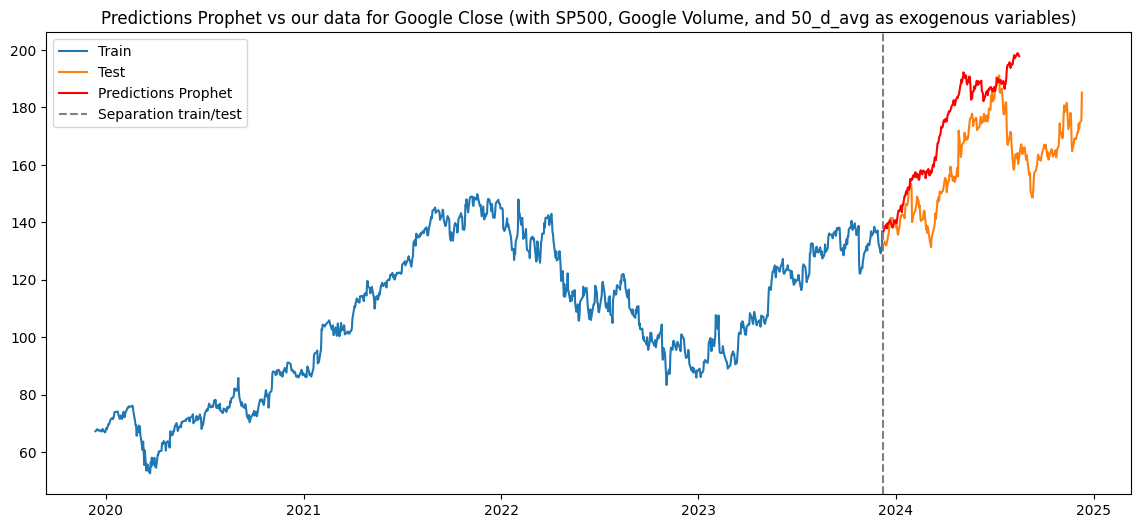

In [ ]:
features = ['SP500', 'Google Volume', '50_d_avg']
target = 'Google Close'

#Preparation
merged_data = merged_data.copy()
train_size = int(len(merged_data) * 0.8)

#Separation
train_data = merged_data.iloc[:train_size].copy()
test_data = merged_data.iloc[train_size:].copy()

train_data = train_data.reset_index()[['Date'] + features + [target]]
test_data = test_data.reset_index()[['Date'] + features + [target]]

#Column rename for Prophet
train_data.rename(columns={
    'Date': 'ds',
    'Google Close': 'y',
    'Google Volume': 'google_volume',
    '50_d_avg': 'avg_50d',
    'SP500': 'sp500'
}, inplace=True)
test_data.rename(columns={
    'Date': 'ds',
    'Google Close': 'y',
    'Google Volume': 'google_volume',
    '50_d_avg': 'avg_50d',
    'SP500': 'sp500'
}, inplace=True)

#Creation of Prophet
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)  #Monthly Seasonality
model.add_regressor('google_volume')  #Google Volume as regression
model.add_regressor('avg_50d')        #50_d_avg as regression
model.add_regressor('sp500')          #SP500 as regression

#training
model.fit(train_data)

#generation of the dataframe
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data) + 1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])

#Adding exogenuous data
future_data['google_volume'] = test_data['google_volume'].values
future_data['avg_50d'] = test_data['avg_50d'].values
future_data['sp500'] = test_data['sp500'].values

#Prediction
forecast = model.predict(future_data)

#Visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet (SP500, Google Volume et 50_d_avg comme variables explicatives)")

#metrics
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#metrics visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

#results visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Google Close (with SP500, Google Volume, and 50_d_avg as exogenous variables)")
plt.show()


### **For Nvidia**

##### Merging of the S&P data and nvidia data

In [ ]:
merged_data = pd.merge(sp500_data, nvidia_data, left_index=True, right_index=True, how='inner')
print(merged_data.head())

                  SP500  Nvidia Open  Nvidia Close  Nvidia Volume  10_d_avg  \
Date                                                                          
2019-12-13  3168.800049      5.60475       5.59975      454704000  5.599750   
2019-12-16  3191.449951      5.64750       5.62875      320976000  5.605023   
2019-12-17  3192.520020      5.64750       5.70725      321196000  5.623610   
2019-12-18  3191.139893      5.74225       5.73775      343548000  5.644362   
2019-12-19  3205.370117      5.77250       5.88650      445360000  5.688387   

            50_d_avg  200_d_avg  Price Movement  
Date                                             
2019-12-13  5.599750   5.599750               1  
2019-12-16  5.600887   5.600039               1  
2019-12-17  5.605058   5.601105               1  
2019-12-18  5.610262   5.602465               1  
2019-12-19  5.621095   5.605291               1  


DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/9or_m4xk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/jzh46klp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76495', 'data', 'file=/tmp/tmp67lhjo0m/9or_m4xk.json', 'init=/tmp/tmp67lhjo0m/jzh46klp.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_modelmpls6lzx/prophet_model-20241211181326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:13:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:13:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


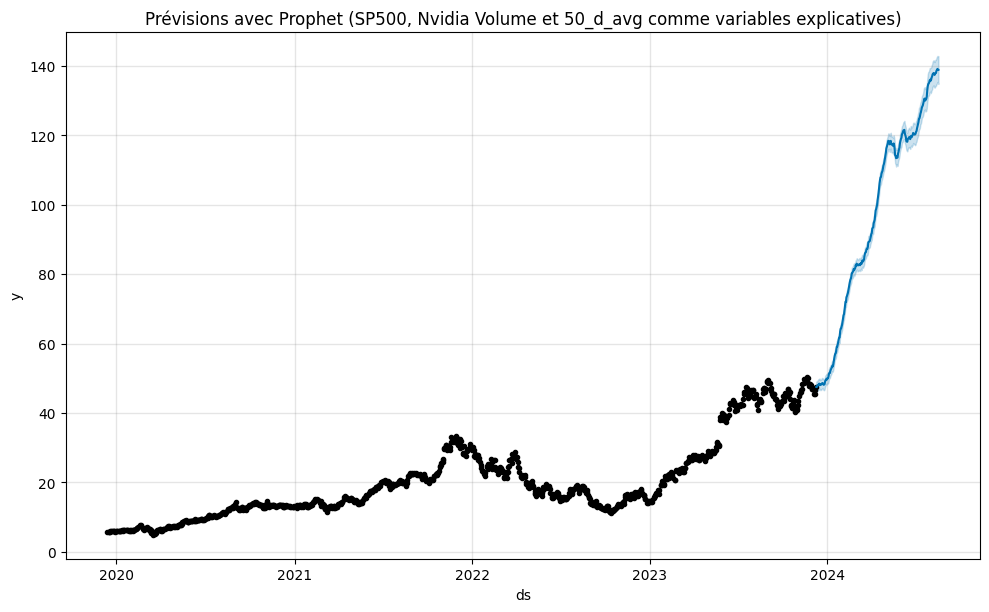

Evaluation Metrics:
Mean Squared Error (MSE): 116.1918
Root Mean Squared Error (RMSE): 10.7792
Mean Absolute Error (MAE): 8.7030
Mean Absolute Percentage Error (MAPE): 8.61%
R-squared (R²): 0.8635
Accuracy: 91.39%


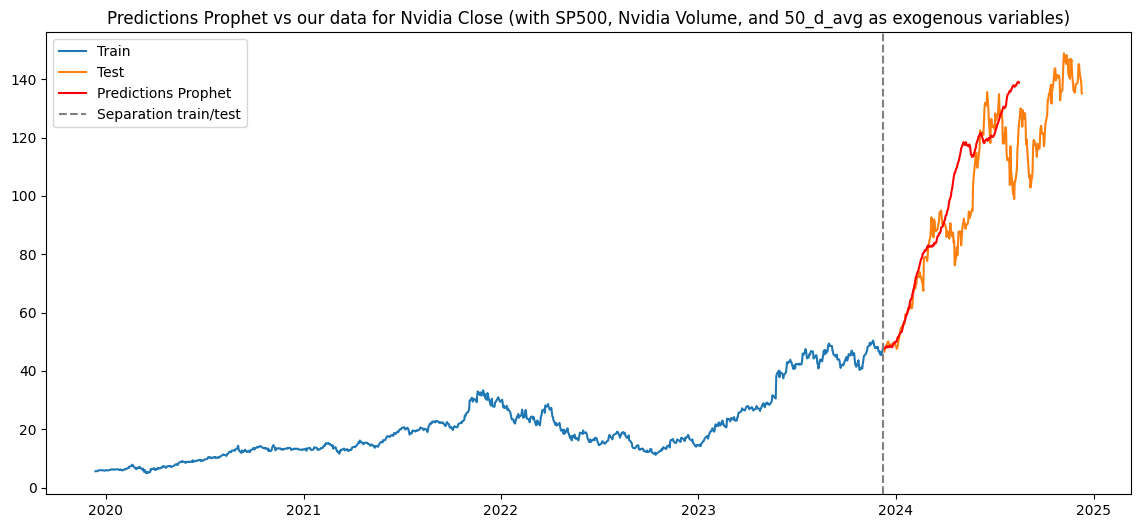

In [ ]:
features = ['SP500', 'Nvidia Volume', '50_d_avg']
target = 'Nvidia Close'

#preparation
merged_data = merged_data.copy()
train_size = int(len(merged_data) * 0.8)

#Separation
train_data = merged_data.iloc[:train_size].copy()
test_data = merged_data.iloc[train_size:].copy()

train_data = train_data.reset_index()[['Date'] + features + [target]]
test_data = test_data.reset_index()[['Date'] + features + [target]]

#columns rename for Prophet
train_data.rename(columns={
    'Date': 'ds',
    'Nvidia Close': 'y',
    'Nvidia Volume': 'nvidia_volume',
    '50_d_avg': 'avg_50d',
    'SP500': 'sp500'
}, inplace=True)
test_data.rename(columns={
    'Date': 'ds',
    'Nvidia Close': 'y',
    'Nvidia Volume': 'nvidia_volume',
    '50_d_avg': 'avg_50d',
    'SP500': 'sp500'
}, inplace=True)

#creation of prophet
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('nvidia_volume')
model.add_regressor('avg_50d')
model.add_regressor('sp500')

#Training
model.fit(train_data)

#Generation of the dataframe
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data) + 1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])

#Adding exogenuous data
future_data['nvidia_volume'] = test_data['nvidia_volume'].values
future_data['avg_50d'] = test_data['avg_50d'].values
future_data['sp500'] = test_data['sp500'].values

#Prediction
forecast = model.predict(future_data)

#Visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet (SP500, Nvidia Volume et 50_d_avg comme variables explicatives)")
plt.show()

#metrics
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#Metrics visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

#Results visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Nvidia Close (with SP500, Nvidia Volume, and 50_d_avg as exogenous variables)")
plt.show()


# **<font color='darkred'>Adding the NASDAQ index</font>**

The NASDAQ index is known today as a reference in the American technological world. As Google and Nvidia are both American and in the NASDAQ index, it will be a lot correlated with our data and then help us doing predictions.

#### **For Google**

In [ ]:
#Download S&P data from Yahoo Finance
nasdaq_data = yf.download("^IXIC", start="2019-12-13", end="2024-12-11")[['Close']]
nasdaq_data.rename(columns={'Close': 'NASDAQ'}, inplace=True)

#Checking if our colomn is multiindex or not
if isinstance(nasdaq_data.columns, pd.MultiIndex):
    nasdaq_data.columns = nasdaq_data.columns.droplevel(0)

nasdaq_data.rename(columns={'^IXIC': 'NASDAQ'}, inplace=True)

#Merging
merged_data = pd.merge(nasdaq_data, google_data, left_index=True, right_index=True, how='inner')
print(merged_data.head())

[*********************100%***********************]  1 of 1 completed

                 NASDAQ  Google Open  Google Close  Google Volume   10_d_avg  \
Date                                                                           
2019-12-13  8734.879883    67.394997     67.343498       33170000  67.343498   
2019-12-16  8814.230469    67.750000     68.035004       28128000  67.469226   
2019-12-17  8823.360352    68.120499     67.744499       32948000  67.519276   
2019-12-18  8827.740234    67.849998     67.595497       23330000  67.533134   
2019-12-19  8887.219727    67.595497     67.821999       28922000  67.585655   

             50_d_avg  200_d_avg  Price Movement  
Date                                              
2019-12-13  67.343498  67.343498               1  
2019-12-16  67.370616  67.350379               0  
2019-12-17  67.385278  67.354300               0  
2019-12-18  67.393522  67.356700               1  
2019-12-19  67.410325  67.361330               0  


DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/5abqg24t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/535dkpzf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3532', 'data', 'file=/tmp/tmp67lhjo0m/5abqg24t.json', 'init=/tmp/tmp67lhjo0m/535dkpzf.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_modelrx3z1okx/prophet_model-20241211181328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:13:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:13:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


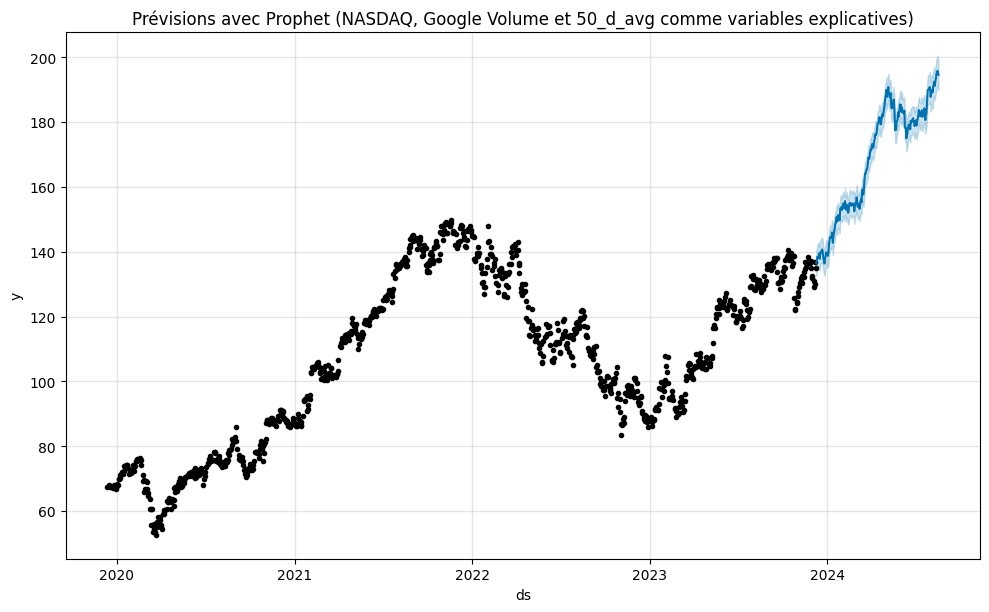

Evaluation Metrics:
Mean Squared Error (MSE): 157.4523
Root Mean Squared Error (RMSE): 12.5480
Mean Absolute Error (MAE): 9.8432
Mean Absolute Percentage Error (MAPE): 6.15%
R-squared (R²): 0.2852
Accuracy: 93.85%


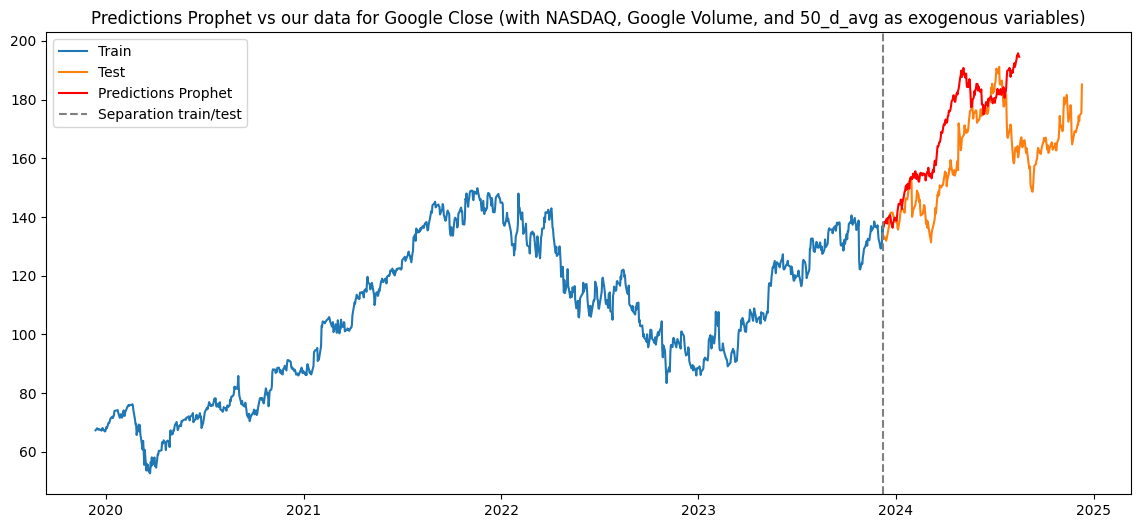

In [ ]:
features = ['NASDAQ', 'Google Volume', '50_d_avg']
target = 'Google Close'

#Preparation
merged_data = merged_data.copy()
train_size = int(len(merged_data) * 0.8)

#Separation
train_data = merged_data.iloc[:train_size].copy()
test_data = merged_data.iloc[train_size:].copy()

train_data = train_data.reset_index()[['Date'] + features + [target]]
test_data = test_data.reset_index()[['Date'] + features + [target]]

#Columns rename for Prophet
train_data.rename(columns={
    'Date': 'ds',
    'Google Close': 'y',
    'Google Volume': 'google_volume',
    '50_d_avg': 'avg_50d',
    'NASDAQ': 'nasdaq'
}, inplace=True)
test_data.rename(columns={
    'Date': 'ds',
    'Google Close': 'y',
    'Google Volume': 'google_volume',
    '50_d_avg': 'avg_50d',
    'NASDAQ': 'nasdaq'
}, inplace=True)

#Creation of the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('google_volume')
model.add_regressor('avg_50d')
model.add_regressor('nasdaq')

#Training
model.fit(train_data)

#Generation of the dataframe for future dates
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data) + 1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])

#Adding exogenuous data
future_data['google_volume'] = test_data['google_volume'].values
future_data['avg_50d'] = test_data['avg_50d'].values
future_data['nasdaq'] = test_data['nasdaq'].values

#Predicton
forecast = model.predict(future_data)

#Visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet (NASDAQ, Google Volume et 50_d_avg comme variables explicatives)")

#metrics
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#Metrics visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

#Results visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Google Close (with NASDAQ, Google Volume, and 50_d_avg as exogenous variables)")
plt.show()


#### **For Nvidia**

In [ ]:
merged_data = pd.merge(nasdaq_data, nvidia_data, left_index=True, right_index=True, how='inner')
print(merged_data.head())

                 NASDAQ  Nvidia Open  Nvidia Close  Nvidia Volume  10_d_avg  \
Date                                                                          
2019-12-13  8734.879883      5.60475       5.59975      454704000  5.599750   
2019-12-16  8814.230469      5.64750       5.62875      320976000  5.605023   
2019-12-17  8823.360352      5.64750       5.70725      321196000  5.623610   
2019-12-18  8827.740234      5.74225       5.73775      343548000  5.644362   
2019-12-19  8887.219727      5.77250       5.88650      445360000  5.688387   

            50_d_avg  200_d_avg  Price Movement  
Date                                             
2019-12-13  5.599750   5.599750               1  
2019-12-16  5.600887   5.600039               1  
2019-12-17  5.605058   5.601105               1  
2019-12-18  5.610262   5.602465               1  
2019-12-19  5.621095   5.605291               1  


DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/3vzvawnt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/0_g8jpaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62844', 'data', 'file=/tmp/tmp67lhjo0m/3vzvawnt.json', 'init=/tmp/tmp67lhjo0m/0_g8jpaf.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_modelyceer64j/prophet_model-20241211181330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:13:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:13:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


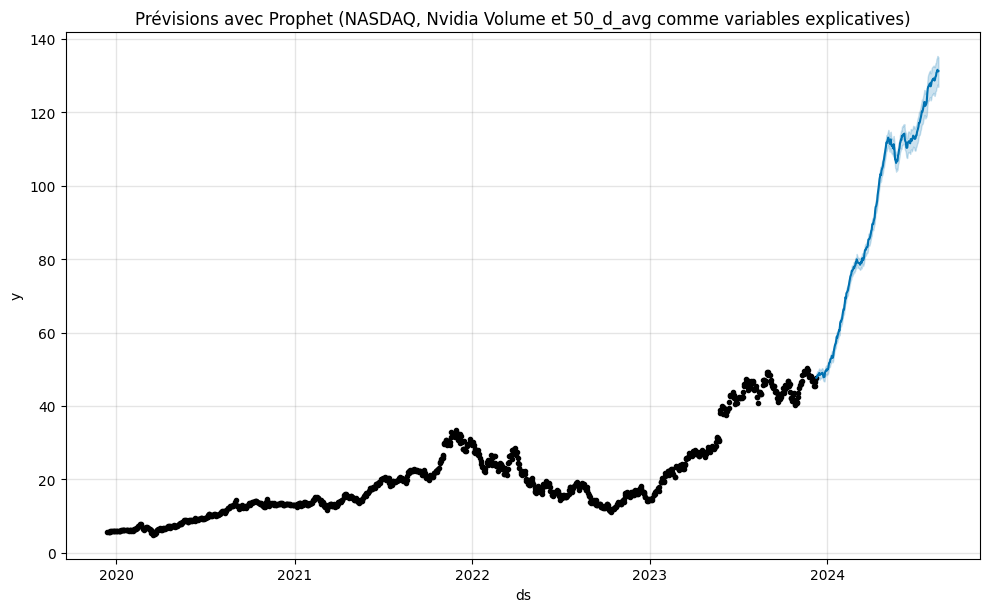

Evaluation Metrics:
Mean Squared Error (MSE): 192.8986
Root Mean Squared Error (RMSE): 13.8888
Mean Absolute Error (MAE): 11.7059
Mean Absolute Percentage Error (MAPE): 11.05%
R-squared (R²): 0.7734
Accuracy: 88.95%


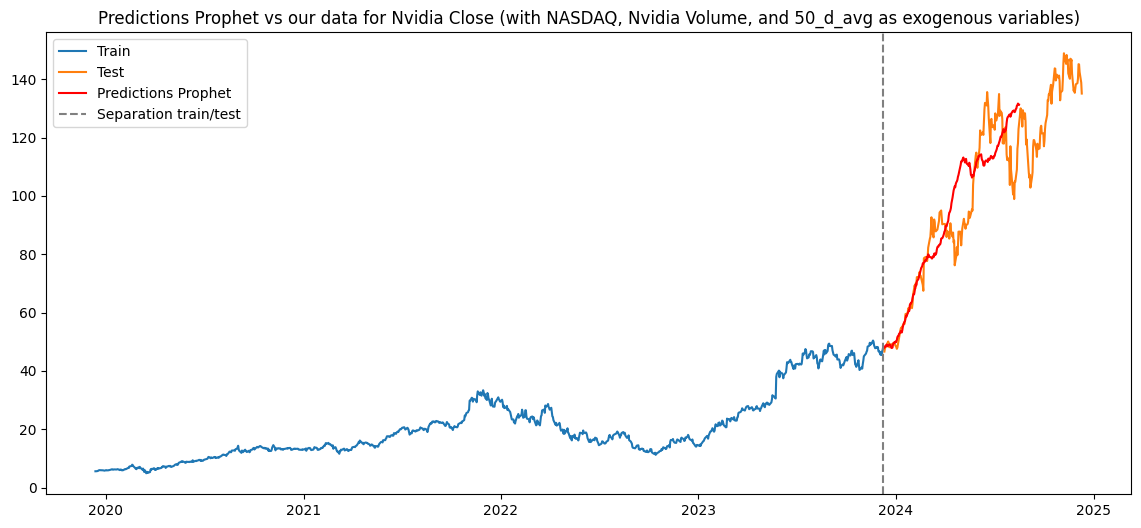

In [ ]:
features = ['NASDAQ', 'Nvidia Volume', '50_d_avg']
target = 'Nvidia Close'

#preparation
merged_data = merged_data.copy()
train_size = int(len(merged_data) * 0.8)

#separation
train_data = merged_data.iloc[:train_size].copy()
test_data = merged_data.iloc[train_size:].copy()

train_data = train_data.reset_index()[['Date'] + features + [target]]
test_data = test_data.reset_index()[['Date'] + features + [target]]

#columns rename for prophet
train_data.rename(columns={
    'Date': 'ds',
    'Nvidia Close': 'y',
    'Nvidia Volume': 'nvidia_volume',
    '50_d_avg': 'avg_50d',
    'NASDAQ': 'nasdaq'
}, inplace=True)
test_data.rename(columns={
    'Date': 'ds',
    'Nvidia Close': 'y',
    'Nvidia Volume': 'nvidia_volume',
    '50_d_avg': 'avg_50d',
    'NASDAQ': 'nasdaq'
}, inplace=True)

#creation of the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('nvidia_volume')
model.add_regressor('avg_50d')
model.add_regressor('nasdaq')

#training
model.fit(train_data)

#generation of the dataframe
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data) + 1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])

#adding exogenuous data
future_data['nvidia_volume'] = test_data['nvidia_volume'].values
future_data['avg_50d'] = test_data['avg_50d'].values
future_data['nasdaq'] = test_data['nasdaq'].values

#predictions
forecast = model.predict(future_data)

#visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet (NASDAQ, Nvidia Volume et 50_d_avg comme variables explicatives)")
plt.show()

#metrics
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#metrics visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

#results visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Nvidia Close (with NASDAQ, Nvidia Volume, and 50_d_avg as exogenous variables)")
plt.show()

# **<font color='darkred'>Prediction on 5 years using our models </font>**

We have settle the fact that we will use Prophet for our predictions since SARIMAX is not adapted and there is too much over-fitting with LSTM. It is important to note that we will use the NASDAQ exogenuous data for Google since we have better result with it, and the S&P for Nvidia with the exact same reason

#### **Google prediction**

##### Merging of the data

In [ ]:
merged_data = pd.merge(nasdaq_data, google_data, left_index=True, right_index=True, how='inner')

                 NASDAQ  Google Open  Google Close  Google Volume   10_d_avg  \
Date                                                                           
2019-12-13  8734.879883    67.394997     67.343498       33170000  67.343498   
2019-12-16  8814.230469    67.750000     68.035004       28128000  67.469226   
2019-12-17  8823.360352    68.120499     67.744499       32948000  67.519276   
2019-12-18  8827.740234    67.849998     67.595497       23330000  67.533134   
2019-12-19  8887.219727    67.595497     67.821999       28922000  67.585655   

             50_d_avg  200_d_avg  Price Movement  
Date                                              
2019-12-13  67.343498  67.343498               1  
2019-12-16  67.370616  67.350379               0  
2019-12-17  67.385278  67.354300               0  
2019-12-18  67.393522  67.356700               1  
2019-12-19  67.410325  67.361330               0  


##### Predictions

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/jiq1jf7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/jh6a5z65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87305', 'data', 'file=/tmp/tmp67lhjo0m/jiq1jf7v.json', 'init=/tmp/tmp67lhjo0m/jh6a5z65.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_model9wygbfbw/prophet_model-20241211182051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


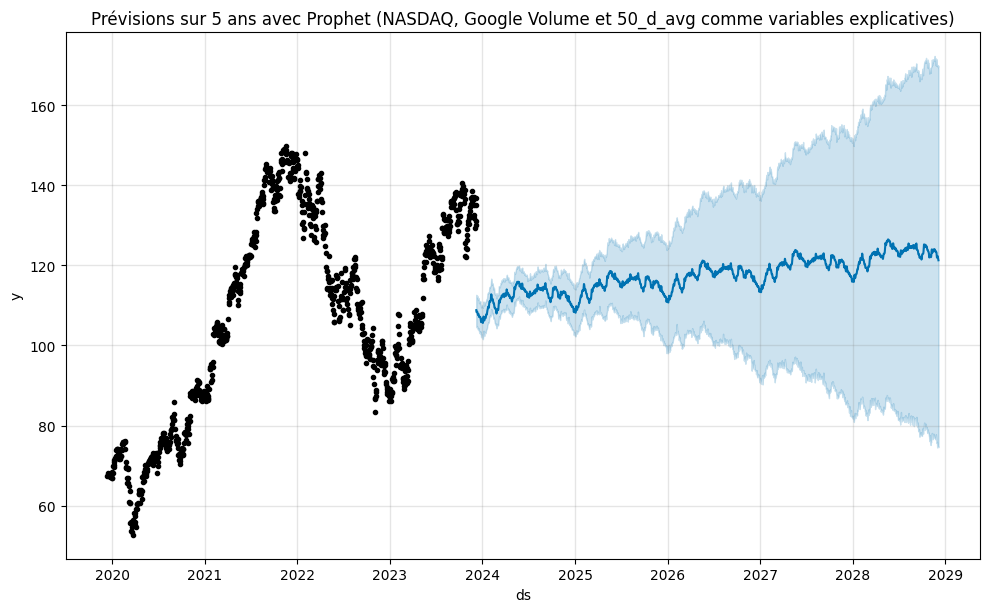

             ds        yhat  yhat_lower  yhat_upper
1815 2028-11-26  123.364875   77.143473  171.290625
1816 2028-11-27  123.247109   75.672737  171.540348
1817 2028-11-28  122.684280   75.650038  171.311651
1818 2028-11-29  122.006729   75.907111  169.889487
1819 2028-11-30  121.896321   74.517045  169.906737
1820 2028-12-01  122.231249   75.637968  170.013569
1821 2028-12-02  122.311886   74.615081  170.011336
1822 2028-12-03  121.987566   74.822184  169.473599
1823 2028-12-04  121.614013   74.797346  169.938985
1824 2028-12-05  121.275091   74.608925  169.136275


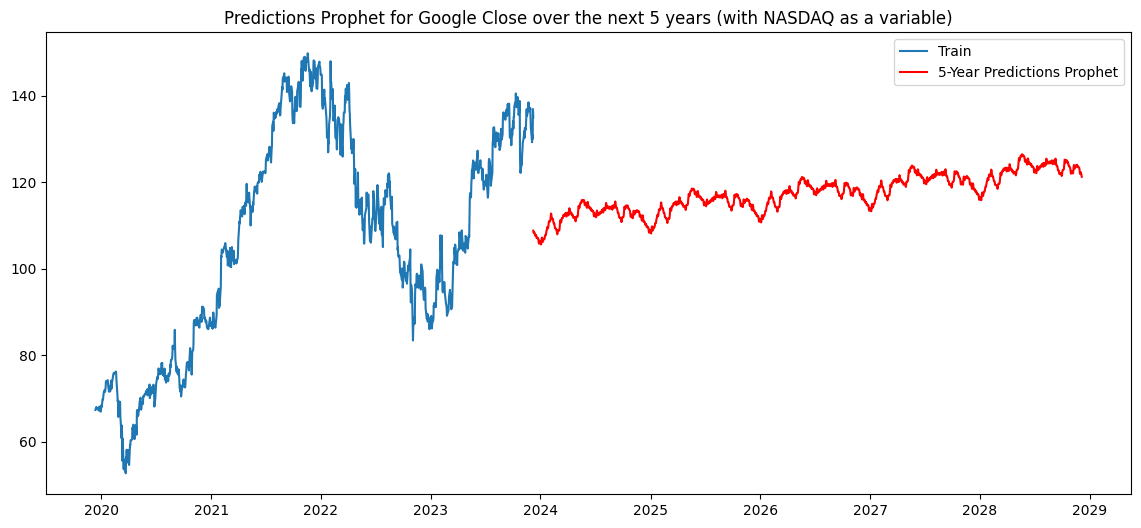

In [ ]:
features = ['NASDAQ', 'Google Volume', '50_d_avg']
target = 'Google Close'

#preparation
merged_data = merged_data.copy()
train_size = int(len(merged_data) * 0.8)

#separation
train_data = merged_data.iloc[:train_size].copy()

#transformation
train_data = train_data.reset_index()[['Date'] + features + [target]]

#column rename for prophet
train_data.rename(columns={
    'Date': 'ds',
    'Google Close': 'y',
    'Google Volume': 'google_volume',
    '50_d_avg': 'avg_50d',
    'NASDAQ': 'nasdaq'
}, inplace=True)

#creation of the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('google_volume')
model.add_regressor('avg_50d')
model.add_regressor('nasdaq')

#training
model.fit(train_data)

#generation of the dataframe for the future
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=1825, freq='D')
future_data = pd.DataFrame(future_dates, columns=['ds'])

#generation of the exogenuous data
#using expectation of existing data
future_data['google_volume'] = train_data['google_volume'].mean()
future_data['avg_50d'] = train_data['avg_50d'].mean()
future_data['nasdaq'] = train_data['nasdaq'].mean()

#prediction
forecast = model.predict(future_data)

#visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions sur 5 ans avec Prophet (NASDAQ, Google Volume et 50_d_avg comme variables explicatives)")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

#result visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(future_data['ds'], forecast['yhat'], color='red', label='5-Year Predictions Prophet')
plt.legend()
plt.title("Predictions Prophet for Google Close over the next 5 years (with NASDAQ as a variable)")
plt.show()


####**Nvidia prediction**

##### Merging of the data

In [ ]:
merged_data = pd.merge(sp500_data, nvidia_data, left_index=True, right_index=True, how='inner')

##### Prediction

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/2_o0yqgx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67lhjo0m/9mzgn7t2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83426', 'data', 'file=/tmp/tmp67lhjo0m/2_o0yqgx.json', 'init=/tmp/tmp67lhjo0m/9mzgn7t2.json', 'output', 'file=/tmp/tmp67lhjo0m/prophet_modelv3fbiem3/prophet_model-20241211182352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:23:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:23:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


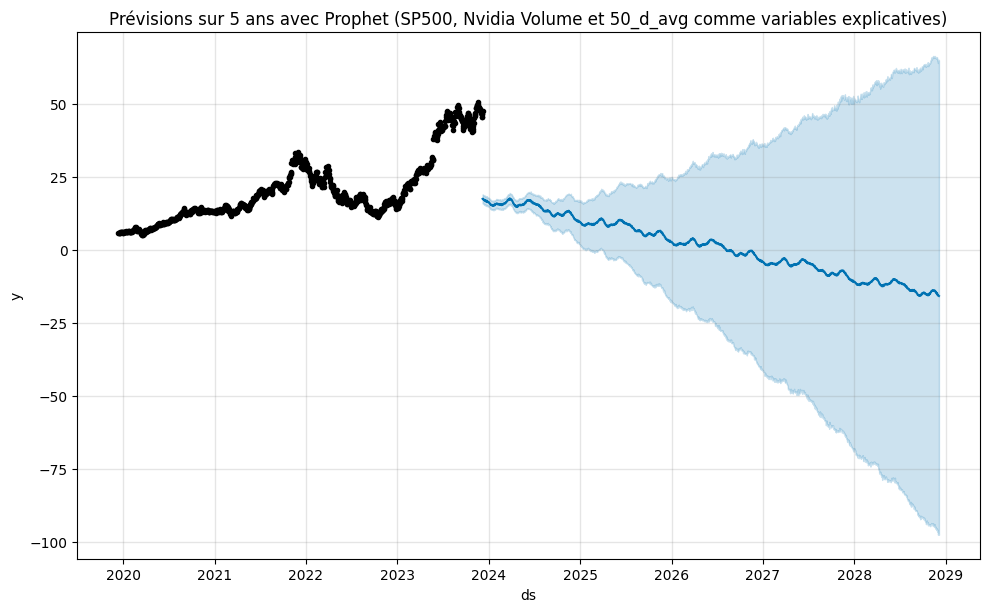

             ds       yhat  yhat_lower  yhat_upper
1815 2028-11-26 -15.026811  -95.778861   65.652949
1816 2028-11-27 -14.843905  -95.414903   65.917654
1817 2028-11-28 -14.953256  -95.754967   65.418661
1818 2028-11-29 -15.378758  -96.520067   64.771751
1819 2028-11-30 -15.608426  -96.078417   64.895396
1820 2028-12-01 -15.555491  -97.507733   63.883976
1821 2028-12-02 -15.584431  -97.056338   64.939903
1822 2028-12-03 -15.733863  -97.416003   65.061689
1823 2028-12-04 -15.785620  -97.091121   64.738733
1824 2028-12-05 -15.844627  -97.542293   64.860367


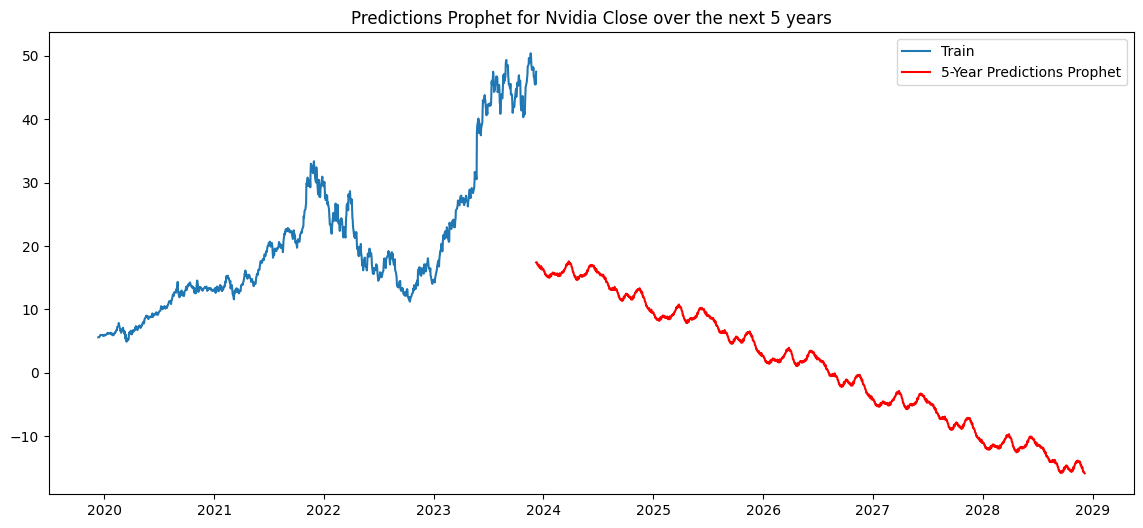

In [ ]:
features = ['SP500', 'Nvidia Volume', '50_d_avg']
target = 'Nvidia Close'

#preparation
merged_data = merged_data.copy()
train_size = int(len(merged_data) * 0.8)

#separation
train_data = merged_data.iloc[:train_size].copy()
train_data = train_data.reset_index()[['Date'] + features + [target]]

#columns rename for Prophet
train_data.rename(columns={
    'Date': 'ds',
    'Nvidia Close': 'y',
    'Nvidia Volume': 'nvidia_volume',
    '50_d_avg': 'avg_50d',
    'SP500': 'sp500'
}, inplace=True)

#creation of the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('nvidia_volume')
model.add_regressor('avg_50d')
model.add_regressor('sp500')

#training
model.fit(train_data)

#generation of the dataframe
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=1825, freq='D')
future_data = pd.DataFrame(future_dates, columns=['ds'])

#generation of the exogenuous data
#use of the expectation of existing data
future_data['nvidia_volume'] = train_data['nvidia_volume'].mean()
future_data['avg_50d'] = train_data['avg_50d'].mean()
future_data['sp500'] = train_data['sp500'].mean()

#prediction
forecast = model.predict(future_data)

#prediction visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions sur 5 ans avec Prophet (SP500, Nvidia Volume et 50_d_avg comme variables explicatives)")
plt.show()
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

#result visualisation
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')  # Données d'entraînement
plt.plot(future_data['ds'], forecast['yhat'], color='red', label='5-Year Predictions Prophet')  # Prédictions sur 5 ans
plt.legend()
plt.title("Predictions Prophet for Nvidia Close over the next 5 years")
plt.show()


# **<font color='darkred'>Results of our projection </font>**

#### **Model Assessment and Reliability**

---



The forecast for Google appears consistent with a stock that has reached a plateau, showing a stable trend. However, the projection for Nvidia raises questions about the underlying assumptions of the model and how it handles specific constraints.

Potential issues with Nvidia’s predictions might include incorrect handling of seasonal patterns, overly aggressive trend extrapolation, or the omission of critical external factors.

#### **Areas for Further Investigation**

---



The Prophet forecasting model is focused on recognizing trends and seasonality. In Nvidia case, we will be exploring further more key variables that can be been factored in appropriately.

For Google, additional external data might provide better insight into whether the flat forecast reflects the influence of the NASDAQ or broader market dynamics that were not accounted for.

#### **Comparative Analysis**

---



Google forecast suggests a stable and neutral trajectory, while Nvidia projection indicates an unlikely decline, signaling possible discrepancies in the model performance across our dataset.